<a href="https://colab.research.google.com/github/Desiree270122/AKG/blob/main/Copy_of_AKG_louvain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdflib

from google.colab import drive
drive.mount('/content/drive')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.9/564.9 kB 15.3 MB/s eta 0:00:00
Mounted at /content/drive


In [ ]:
!pip install rdflib networkx scikit-learn matplotlib


In [ ]:
from rdflib import URIRef, BNode, Literal
from rdflib import Namespace
from rdflib.namespace import CSVW, DC, DCAT, DCTERMS, DOAP, FOAF, ODRL2, ORG, OWL
from rdflib import Graph, URIRef, Literal, BNode
from rdflib.namespace import FOAF, RDF

In [ ]:
from rdflib import Graph, RDF, URIRef, Namespace

# Load the RDF data
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Define namespace and type for entities (adjust as needed)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Replace with your actual namespace

# Extract and print relevant assertions
relevant_assertions = []

for subj, pred, obj in graph:
    # Exclude subjects and predicates starting with "has" or "is"
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        relevant_assertions.append((subj, pred, obj))

# Print relevant assertions
for subj, pred, obj in relevant_assertions:
    print(f"Subject: {subj.split('#')[-1]}\nPredicate: {pred.split('#')[-1]}\nObject: {obj.split('#')[-1]}\n" )



Subject: nf8cd24acc3b143698c6355c0627870cfb1
Predicate: first
Object: http://sonfack.com/2023/12/tao/hasRole

Subject: http://sonfack.com/2023/12/tao/Computer
Predicate: type
Object: Class

Subject: http://sonfack.com/2023/12/tao/Communication
Predicate: subClassOf
Object: http://sonfack.com/2023/12/tao/SoftResource

Subject: http://sonfack.com/2023/12/tao/tutor-e4449e8b-a090-4652-9b91-231d9e7a070a
Predicate: type
Object: http://sonfack.com/2023/12/tao/Tutor

Subject: http://sonfack.com/2023/12/tao/sepractical-88ca540f-fd64-4a3c-92fd-590a12f1f46b
Predicate: http://sonfack.com/2023/12/cao/hasTime
Object: http://sonfack.com/2023/12/tao/10AM-12AM-f4e589a5-aac9-42b7-b498-706732141ca1

Subject: http://sonfack.com/2023/12/tao/teacher-09c4175e-f119-4d66-ac53-920a5c9dc796
Predicate: http://sonfack.com/2023/12/tao/hasName
Object: DB course teacher

Subject: http://sonfack.com/2023/12/tao/tutorialroom-57179062-99d4-4da0-88b4-e800809fac73
Predicate: http://sonfack.com/2023/12/tao/hasName
Object: 

In [ ]:
from rdflib import Namespace, Graph, URIRef
from rdflib.namespace import RDF
import networkx as nx
import matplotlib.pyplot as plt

akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
g = Graph()
g.parse(akg_file)
G = nx.DiGraph()
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")


def read_all_activities(akg: Graph, as_str=True) -> list:
    """This function returns all activities of an activity knowledge graph
    - akg: an activity knowledge graph as parsed by RDFLib
    - as_str: (boolean) tells if the activities are simple str default = True
    """
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities_list


def read_akg_node(node_uri: str, akg:Graph, as_str=True) -> dict:
    """This function returns all elements directly linked to a akg node
    - activity_uri (string): the given activity uri in graph akg
    - akg (Graph): an activity knowledge graph as parsed by RDFLib
    """

    activity_info = {}
    activity_uri_ref = f"{akg_namespace}{node_uri}"
    print(activity_uri_ref)
    for act_predicate, act_object in akg.predicate_objects(subject=URIRef(activity_uri_ref)):
        pred = act_predicate
        obj = act_object
        if as_str:
            pred = str(act_predicate)
            obj = str(act_object)
        if pred in activity_info:
            existing_objects = activity_info[pred] + [obj]
            activity_info[pred] = existing_objects
        else:
            activity_info[pred] = [obj]
    return activity_info


In [ ]:
def add_activity_to_nxgraph(G,activity_uri, activity_info):
  print("affichage des informations", activity_info)
  activity_g = nx.DiGraph()
  for pred, obj_list in activity_info.items():

    pred_label = pred.split('/')[-1]
    for obj in obj_list:

      obj_label = obj.split('/')[-1]
      G.add_node(activity_uri)
      G.add_node(obj_label)
      G.add_edge(activity_uri, obj_label, label=pred_label)
      activity_g.add_node(activity_uri)
      activity_g.add_node(obj_label)
      activity_g.add_edge(activity_uri, obj_label, label=pred_label)
  visualize_activity(activity_g)

In [ ]:
def visualize_activity(G):
  # Visualize the graph
  plt.figure(figsize=(12, 12))

  # Generate positions for nodes using a layout algorithm
  pos = nx.spring_layout(G, seed=42)

  # Draw the nodes and edges
  nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

  # Draw edge labels
  edge_labels = nx.get_edge_attributes(G, 'label')
  nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

  # Show plot
  plt.title("Graphe de Connaissances des Activités")
  plt.show()


In [ ]:
liste_activity = read_all_activities(g, as_str=True)
print(liste_activity)
for activity in liste_activity:
  subj = activity.split('/')[-1]
  info_activity = read_akg_node(subj, g, as_str=True)
  print(info_activity)
  add_activity_to_nxgraph(G,activity,info_activity)

# Visualize the graph
plt.figure(figsize=(12, 12))

# Generate positions for nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Show plot
plt.title("Graphe de Connaissances des Activités")
plt.show()


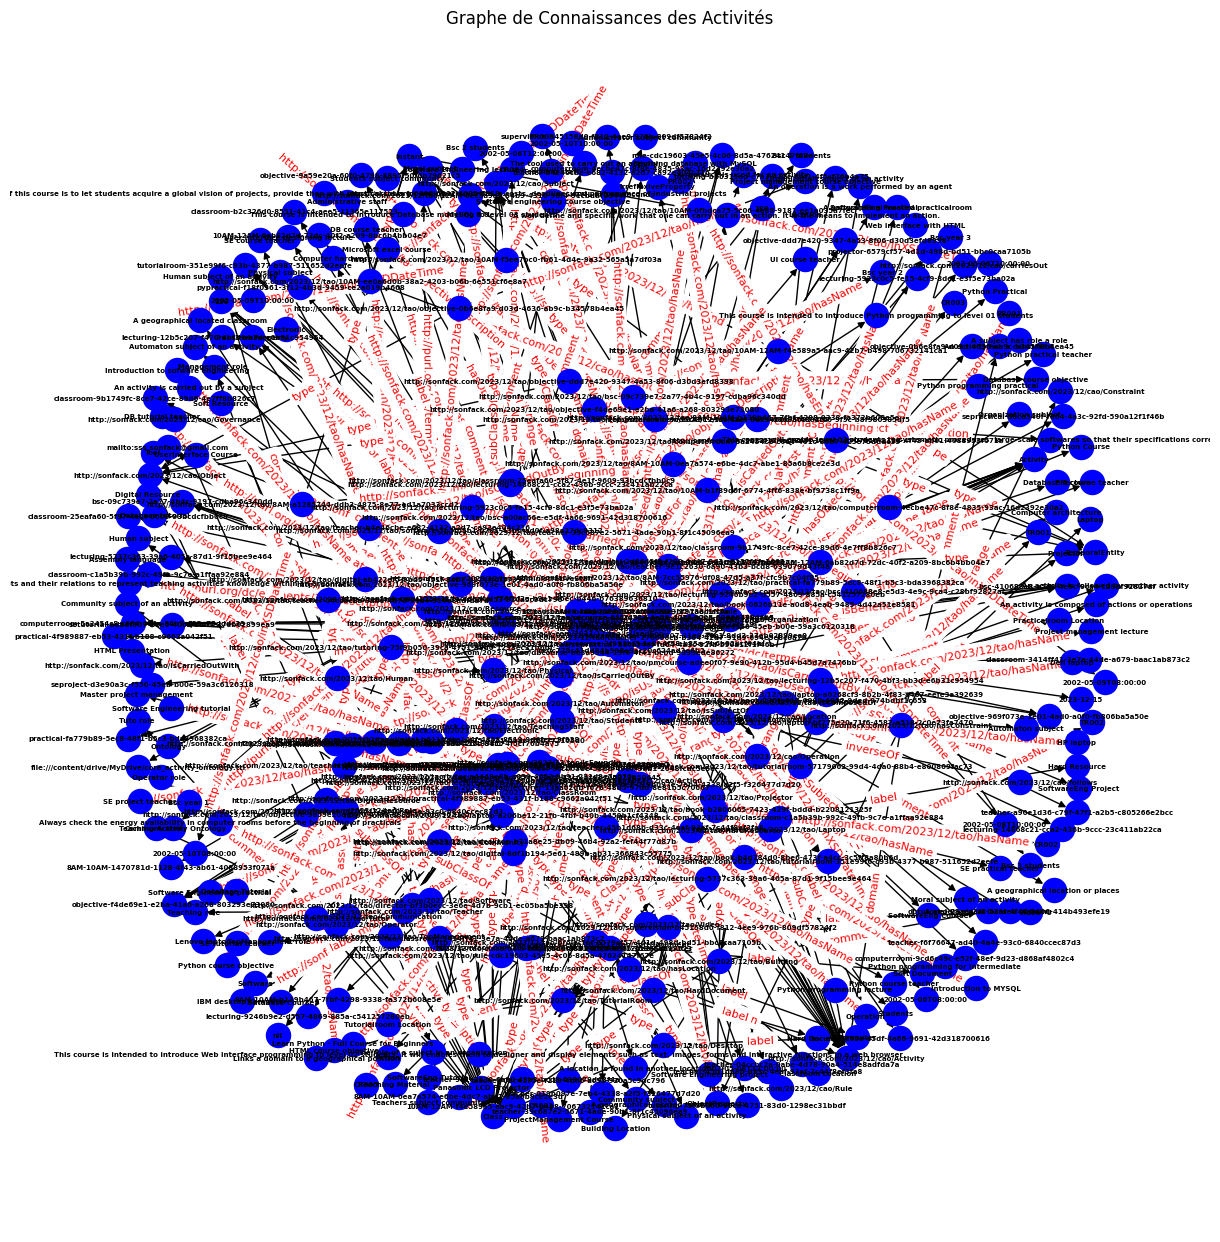

In [ ]:


# Define namespace and type for entities (adjust as needed)
TAO = Namespace("http://sonfack.com/2024/01/tao#")  # Replace with your actual namespace

# Initialize NetworkX graph
#G = nx.DiGraph()
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")


# Using directed graph to capture the direction of relationships
# Extract and add relevant assertions to the graph
for subj, pred, obj in graph:
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        subj_label = subj.split('#')[-1]
        pred_label = pred.split('#')[-1]
        obj_label = obj.split('#')[-1]
        G.add_node(subj_label)  # Add subject node
        G.add_node(obj_label)   # Add object node
        G.add_edge(subj_label, obj_label, label=pred_label)  # Add edge with predicate as label

# Visualize the graph
plt.figure(figsize=(12, 12))

# Generate positions for nodes using a layout algorithm
pos = nx.spring_layout(G, seed=42)

# Draw the nodes and edges
nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Show plot
plt.title("Graphe de Connaissances des Activités")
plt.show()


In [ ]:
!pip install python-louvain


In [ ]:
from community import community_louvain

import networkx as nx
from community import community_louvain

# Convertir le graphe en non dirigé
G_undirected = G.to_undirected()

# Appliquer l'algorithme de Louvain
partitions = community_louvain.best_partition(G_undirected)

# Afficher le nombre de communautés détectées
print(f"Nombre de communautés détectées: {len(set(partitions.values()))}")


Nombre de communautés détectées: 12


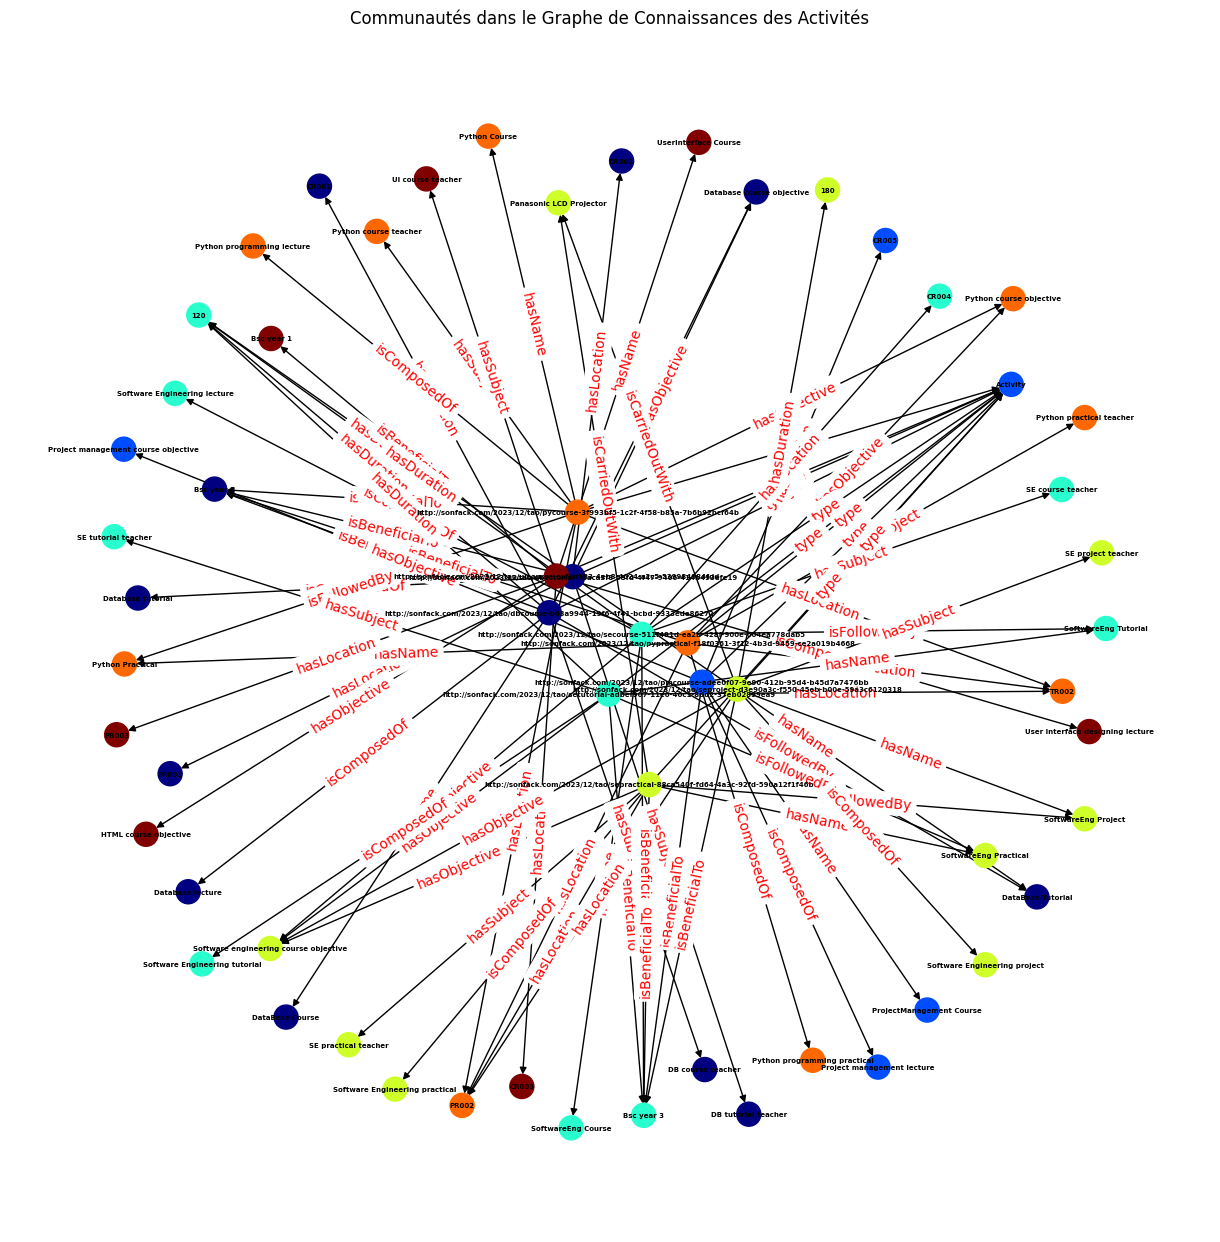

In [ ]:


def read_all_activities(akg: Graph, as_str=True) -> list:
    """Retourne toutes les activités d'un graphe de connaissances."""
    activities_list = [str(activity) if as_str else activity for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities_list

def read_akg_node(node_uri: str, akg: Graph, as_str=True) -> dict:
    """Retourne tous les éléments directement liés à un nœud du graphe."""
    activity_info = {}
    activity_uri_ref = f"{akg_namespace}{node_uri}"
    for act_predicate, act_object in akg.predicate_objects(subject=URIRef(activity_uri_ref)):
        pred = act_predicate
        obj = act_object
        if as_str:
            pred = str(act_predicate)
            obj = str(act_object)
        if pred in activity_info:
            existing_objects = activity_info[pred] + [obj]
            activity_info[pred] = existing_objects
        else:
            activity_info[pred] = [obj]
    return activity_info

def add_activity_to_nxgraph(G, activity_uri, activity_info):
    """Ajoute les activités et leurs relations au graphe NetworkX."""
    for pred, obj_list in activity_info.items():
        pred_label = pred.split('/')[-1]
        if '#' in pred_label:
            pred_label = pred_label.split('#')[1]

        for obj in obj_list:
            obj_label = obj.split('/')[-1]
            node_info = read_akg_node(obj_label, graph)

            if node_info:
                # Assurez-vous que vous récupérez une chaîne et non une liste
                obj_label = node_info.get('http://sonfack.com/2023/12/tao/hasName', [None])[0]
                if obj_label is None:
                    continue

            G.add_node(activity_uri)
            G.add_node(obj_label)
            G.add_edge(activity_uri, obj_label, label=pred_label)

def visualize_activity(G):
    """Visualiser le graphe de connaissances."""
    plt.figure(figsize=(12, 12))
     # Utiliser une palette de couleurs pour les différentes communautés
    community_colors = [f"C{community_id % 10}" for community_id in partition.values()]

    pos = nx.spring_layout(G, seed=42)
     # Dessiner les nœuds avec les couleurs de la communauté
    nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=300, cmap=plt.cm.Set1)


     # Dessiner les nœuds avec les couleurs de la communauté
    nx.draw_networkx_nodes(G, pos, node_color=community_colors, node_size=300, cmap=plt.cm.Set1)

    # Afficher les labels des arêtes
    nx.draw(G, pos, with_labels=True, node_size=300, node_color="blue", font_size=5, font_weight="bold", edge_color="black")
     # Dessiner les arêtes
    nx.draw_networkx_edges(G, pos, edge_color="gray", alpha=0.5)

    # Afficher les labels des nœuds
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='bold', font_size=10)
    plt.title("Graphe de Connaissances des Activités")
    plt.show()

# Charger le fichier RDF dans un graphe NetworkX
G = nx.DiGraph()

# Lire toutes les activités
liste_activity = read_all_activities(graph, as_str=True)

# Ajouter chaque activité au graphe
for activity in liste_activity:
    subj = activity.split('/')[-1]
    info_activity = read_akg_node(subj, graph, as_str=True)
    add_activity_to_nxgraph(G, activity, info_activity)

# Détection des communautés
partition = community_louvain.best_partition(G.to_undirected())

# Visualiser les communautés
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)
colors = [partition[node] for node in G.nodes()]
nx.draw(G, pos, node_color=colors, with_labels=True, node_size=300, cmap=plt.cm.jet, font_size=5, font_weight="bold", edge_color="black")
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=10)
plt.title("Communautés dans le Graphe de Connaissances des Activités")
plt.show()



In [ ]:

# Initialiser un graphe orienté
G = nx.DiGraph()
# Exemples d'activité et d'informations à ajouter (à ajuster selon vos données)
activity_uri = "http://example.com/activity1"
activity_info = {
    "http://example.com/predicate1": ["http://example.com/object1", "http://example.com/object2"],
    "http://example.com/predicate2": ["http://example.com/object3"]
}


# Parcourez le graphe RDF et ajoutez les nœuds et arêtes dans G
for subj, pred, obj in graph:
    if not str(pred).startswith("http://sonfack.com/2024/01/tao#has") and not str(pred).startswith("http://sonfack.com/2024/01/tao#is"):
        subj_label = subj.split('#')[-1]
        pred_label = pred.split('#')[-1]
        obj_label = obj.split('#')[-1]
        G.add_node(subj_label)  # Ajouter un nœud pour le sujet
        G.add_node(obj_label)   # Ajouter un nœud pour l'objet
        G.add_edge(subj_label, obj_label, label=pred_label)  # Ajouter une arête avec le prédicat comme étiquette

print(f"Nombre de nœuds : {G.number_of_nodes()}")
print(f"Nombre d'arêtes : {G.number_of_edges()}")


Nombre de nœuds : 314
Nombre d'arêtes : 489


In [ ]:
from rdflib import Graph, RDF, Namespace
import re

# Assurez-vous d'avoir défini les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
print("Liste de toutes les activités :")
for activity in all_activities:
    activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
    print(activity_name)






Liste de toutes les activités :
Dbcourse
Dbtutorial
Pycourse
Pypractical
Uicourse
Pmcourse
Secourse
Setutorial
Sepractical
Seproject


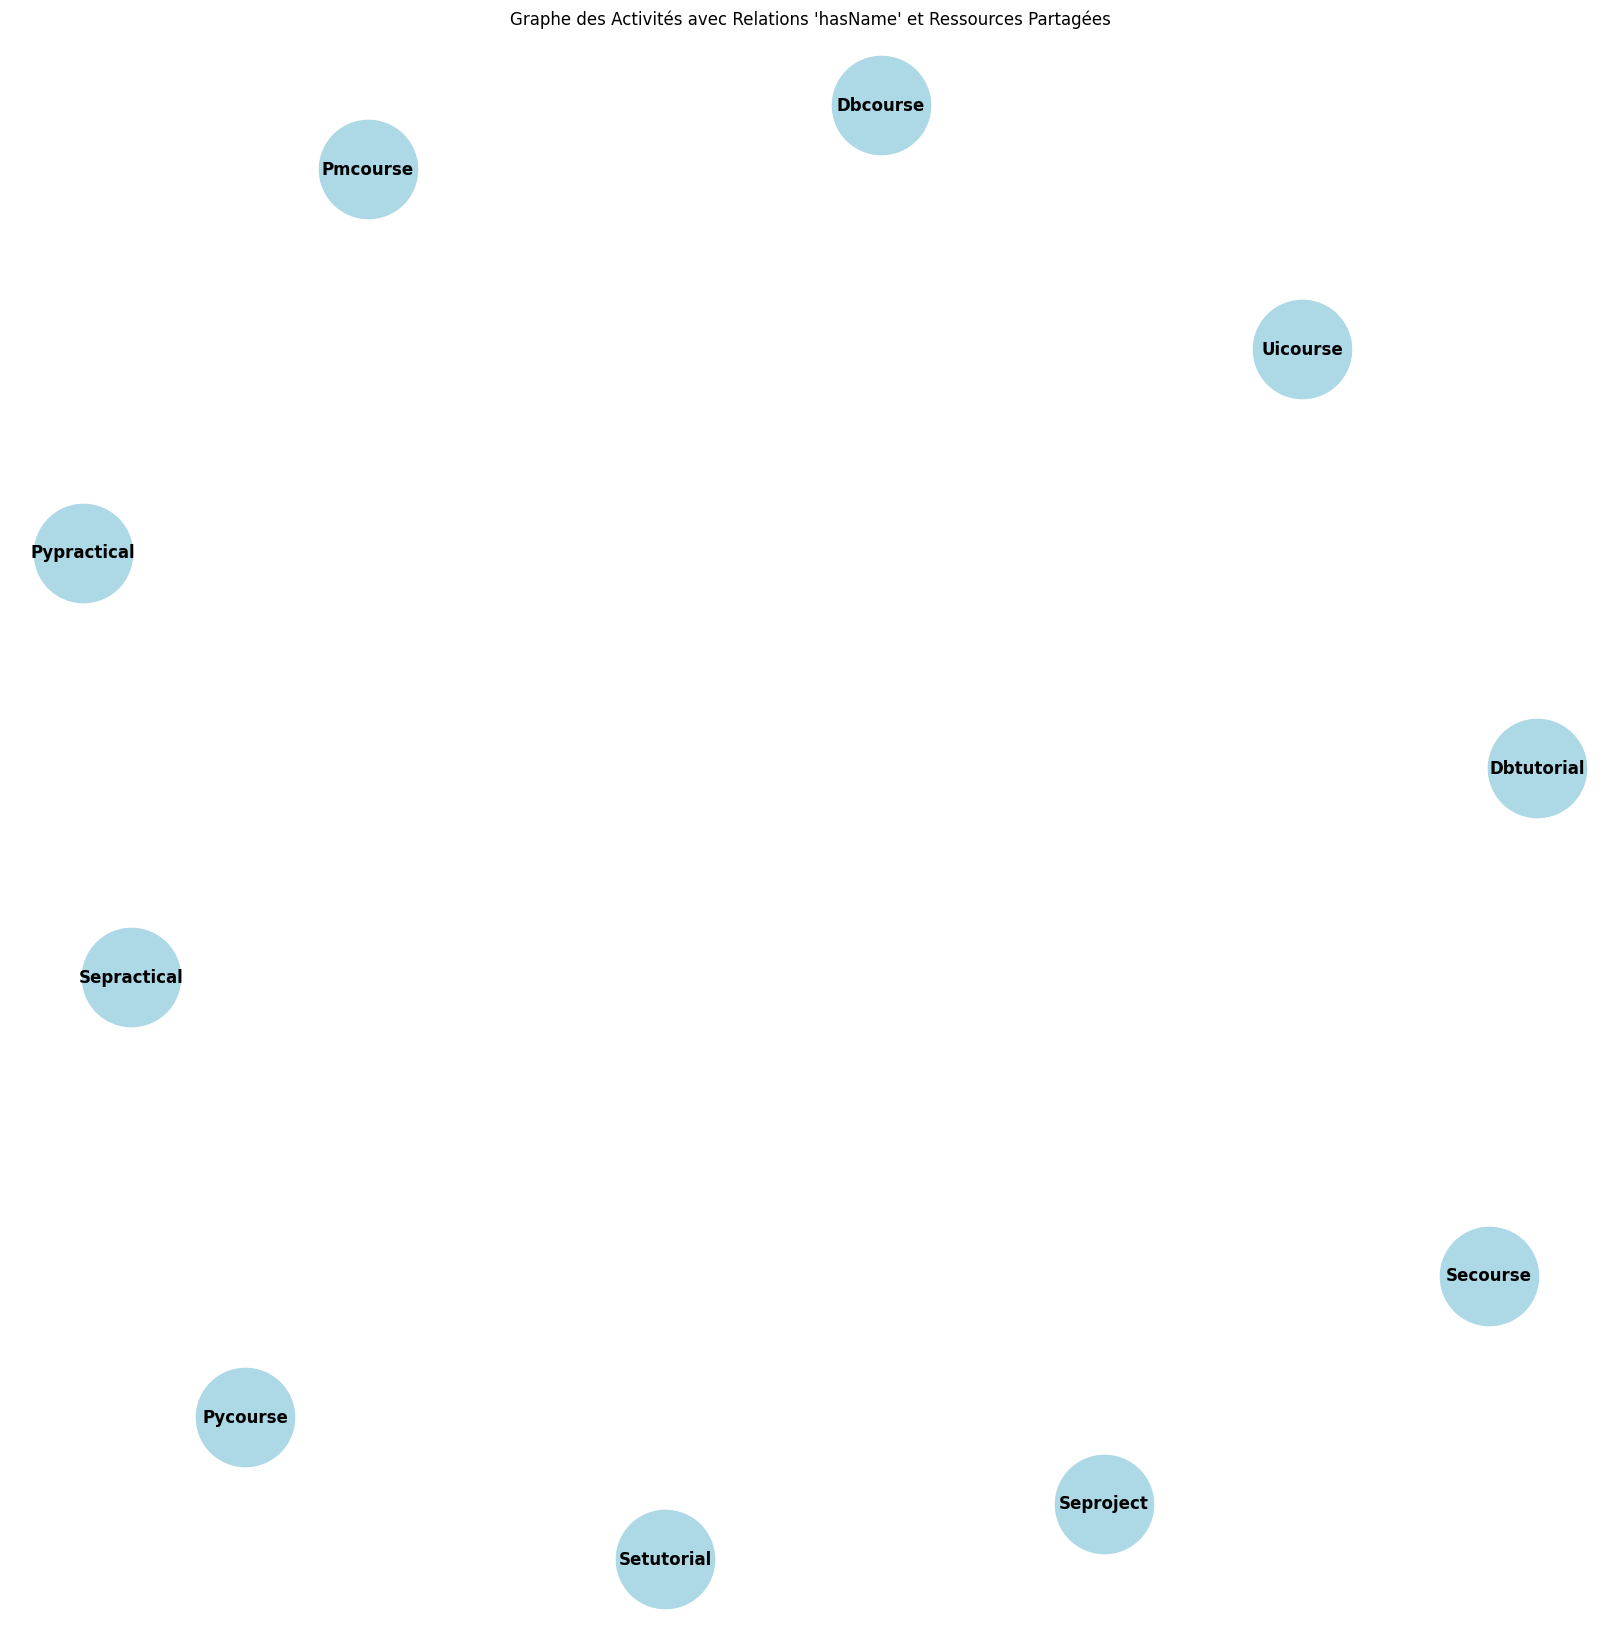

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
import re
from collections import defaultdict

# Assurez-vous d'avoir défini les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")

def get_all_subjects(akg: Graph) -> list:
    """Retourne une liste de tous les sujets des activités dans le graphe RDF."""
    subjects = [str(subj) for subj in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return subjects

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplace le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Liste des activités spécifiques que tu veux visualiser
activities_to_include = [
    "Dbcourse", "Dbtutorial", "Pycourse", "Pypractical",
    "Uicourse", "Pmcourse", "Secourse", "Setutorial",
    "Sepractical", "Seproject"
]

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Dictionnaire pour stocker les ressources partagées entre les sujets
shared_resources = defaultdict(set)

# Ajouter les nœuds pour chaque sujet de la liste d'activités
for activity in activities_to_include:
    activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
    G.add_node(activity_name)

# Ajouter des arêtes entre les sujets de type 'Activity' si elles partagent des ressources
for subj, pred, obj in graph:
    if str(pred) == str(tao_namespace.hasName):  # On s'intéresse uniquement aux prédicats 'hasName'
        subj_name = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
        obj_name = extract_name_without_identifiers(str(obj), "http://sonfack.com/2023/12/tao/")

        # Ajouter l'objet comme une ressource partagée par les sujets
        if subj_name in activities_to_include and obj_name in activities_to_include:
            shared_resources[subj_name].add(obj_name)
            shared_resources[obj_name].add(subj_name)
            G.add_edge(subj_name, obj_name, label="hasName")

# Colorer les arêtes en fonction des ressources partagées
edge_colors = []
for u, v, data in G.edges(data=True):
    # Si les sujets partagent plus d'une ressource, colorier l'arête différemment
    if len(shared_resources[u].intersection(shared_resources[v])) > 1:
        edge_colors.append('green')  # Arêtes entre sujets qui partagent plusieurs ressources
    else:
        edge_colors.append('gray')   # Arêtes standards

# Visualisation du graphe avec une disposition différente
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring avec un paramètre k ajusté pour espacer les nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)  # Augmenter 'k' augmente l'espacement

# Dessiner les nœuds et les arêtes avec les noms des activités
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12, font_weight="bold", edge_color=edge_colors)

# Afficher les labels des arêtes
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités avec Relations 'hasName' et Ressources Partagées")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


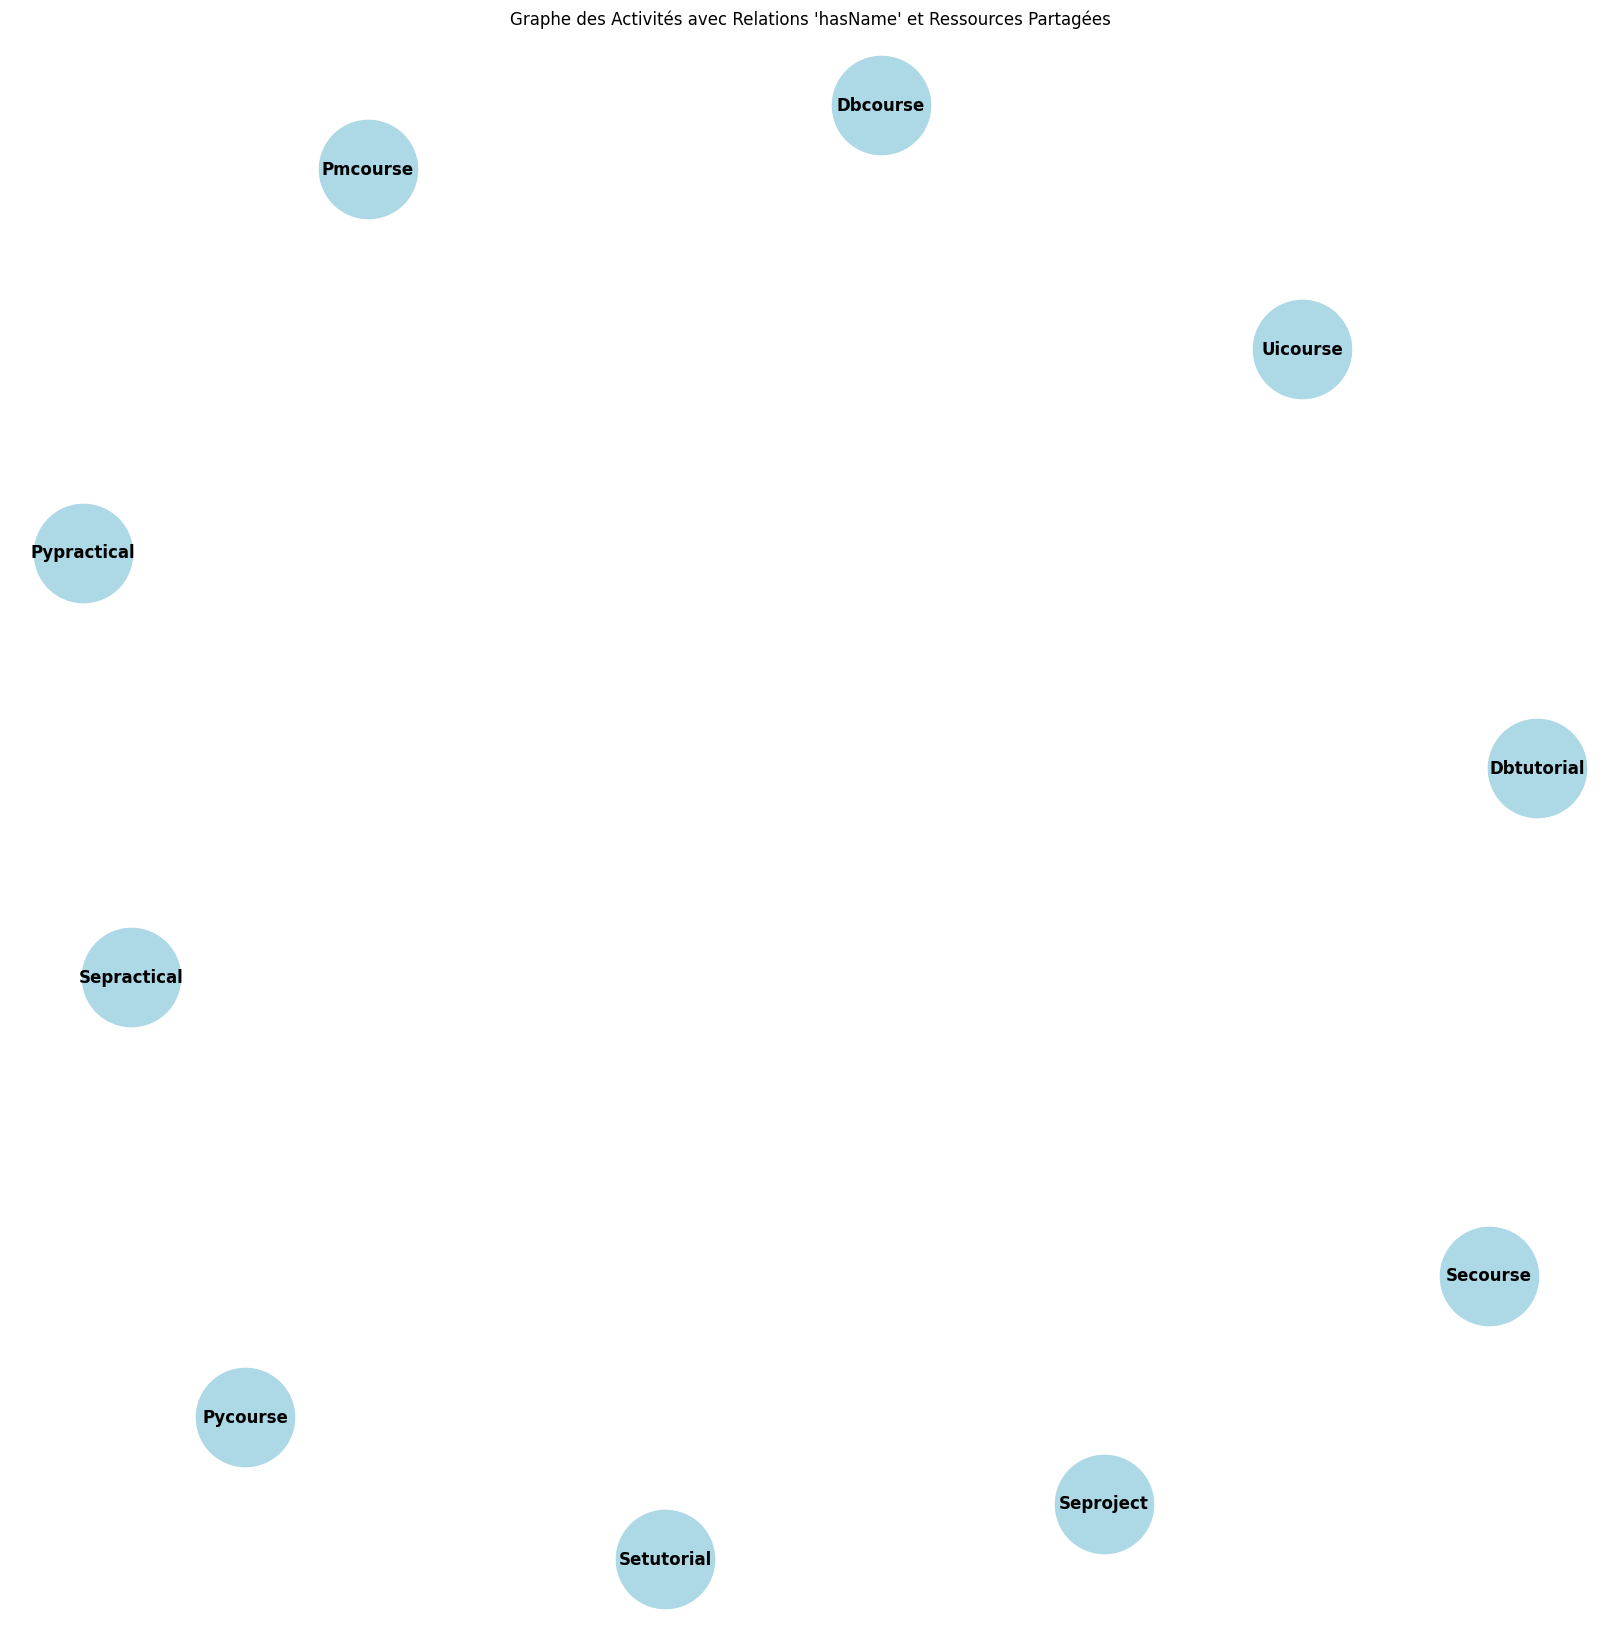

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
import re
from collections import defaultdict

# Assurez-vous d'avoir défini les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")

def get_all_subjects(akg: Graph) -> list:
    """Retourne une liste de tous les sujets des activités dans le graphe RDF."""
    subjects = [str(subj) for subj in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return subjects

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplace le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Liste des activités spécifiques que tu veux visualiser
activities_to_include = [
    "Dbcourse", "Dbtutorial", "Pycourse", "Pypractical",
    "Uicourse", "Pmcourse", "Secourse", "Setutorial",
    "Sepractical", "Seproject"
]

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Dictionnaire pour stocker les ressources partagées entre les sujets
shared_resources = defaultdict(set)

# Ajouter les nœuds pour chaque sujet de la liste d'activités
for activity in activities_to_include:
    activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
    G.add_node(activity_name)

# Ajouter des arêtes entre les sujets de type 'Activity' si elles partagent des ressources
for subj, pred, obj in graph:
    if str(pred) == str(tao_namespace.hasName):  # On s'intéresse uniquement aux prédicats 'hasName'
        subj_name = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
        obj_name = extract_name_without_identifiers(str(obj), "http://sonfack.com/2023/12/tao/")

        # Vérifie si les deux noms sont dans la liste des activités
        if subj_name in activities_to_include and obj_name in activities_to_include:
            # Ajoute les objets comme ressources partagées
            shared_resources[subj_name].add(obj_name)
            shared_resources[obj_name].add(subj_name)
            G.add_edge(subj_name, obj_name, label="hasName")

# Colorer les arêtes en fonction des ressources partagées
edge_colors = []
for u, v, data in G.edges(data=True):
    # Si les sujets partagent plus d'une ressource, colorier l'arête différemment
    if len(shared_resources[u].intersection(shared_resources[v])) > 1:
        edge_colors.append('green')  # Arêtes entre sujets qui partagent plusieurs ressources
    else:
        edge_colors.append('gray')   # Arêtes standards


# Ajuster la visualisation pour les nœuds d'arrêt
# Colorier les nœuds d'arrêt différemment
node_colors = ['lightblue' if 'stop' not in node else 'orange' for node in G.nodes]

# Ajuster la taille des nœuds pour les arrêts (ils peuvent être plus petits)
node_sizes = [5000 if 'stop' not in node else 3000 for node in G.nodes]



# Visualisation du graphe avec une disposition différente
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring avec un paramètre k ajusté pour espacer les nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)  # Augmenter 'k' augmente l'espacement

# Dessiner les nœuds et les arêtes avec les noms des activités
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12, font_weight="bold", edge_color=edge_colors)

# Afficher les labels des arêtes
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités avec Relations 'hasName' et Ressources Partagées")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


Liste de toutes les activités :
['Dbcourse', 'Dbtutorial', 'Pycourse', 'Pypractical', 'Uicourse', 'Pmcourse', 'Secourse', 'Setutorial', 'Sepractical', 'Seproject']


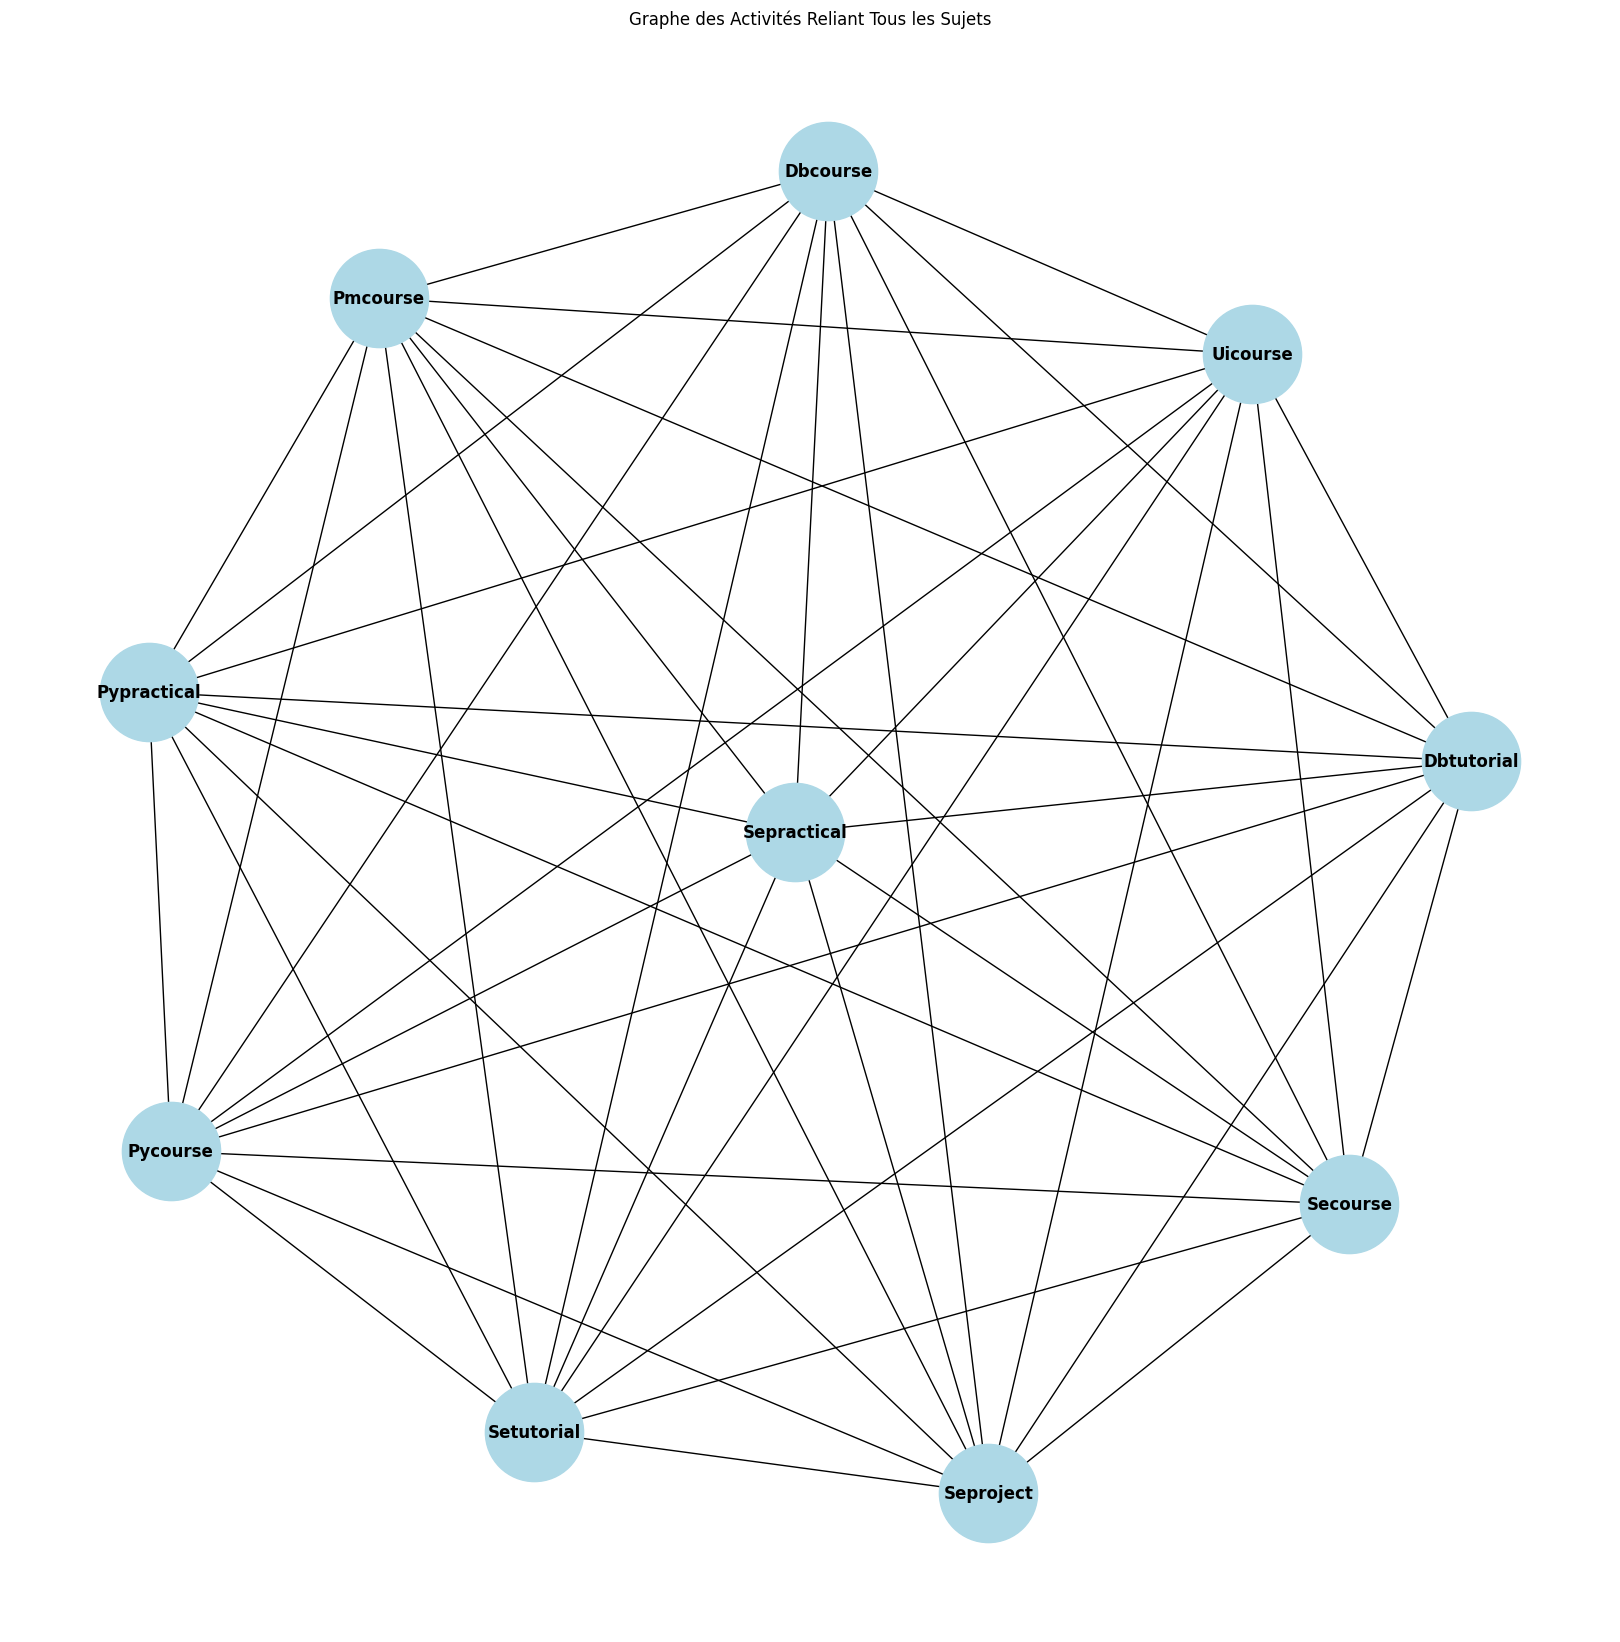

In [ ]:
from rdflib import Graph, RDF, Namespace
import re
import networkx as nx
import matplotlib.pyplot as plt

# Assurez-vous d'avoir défini les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")  # Namespace des activités
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")  # Namespace des relations

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplacez le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
print("Liste de toutes les activités :")
activities_names = [extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/") for activity in all_activities]
print(activities_names)

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Ajouter les nœuds pour chaque activité
for activity_name in activities_names:
    G.add_node(activity_name)

# Ajouter des arêtes entre toutes les activités
for i in range(len(activities_names)):
    for j in range(i + 1, len(activities_names)):
        G.add_edge(activities_names[i], activities_names[j])

# Visualisation du graphe avec une disposition différente
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring avec un paramètre k ajusté pour espacer les nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)  # Augmenter 'k' augmente l'espacement

# Dessiner les nœuds et les arêtes avec les noms des activités
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12, font_weight="bold")

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités Reliant Tous les Sujets")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


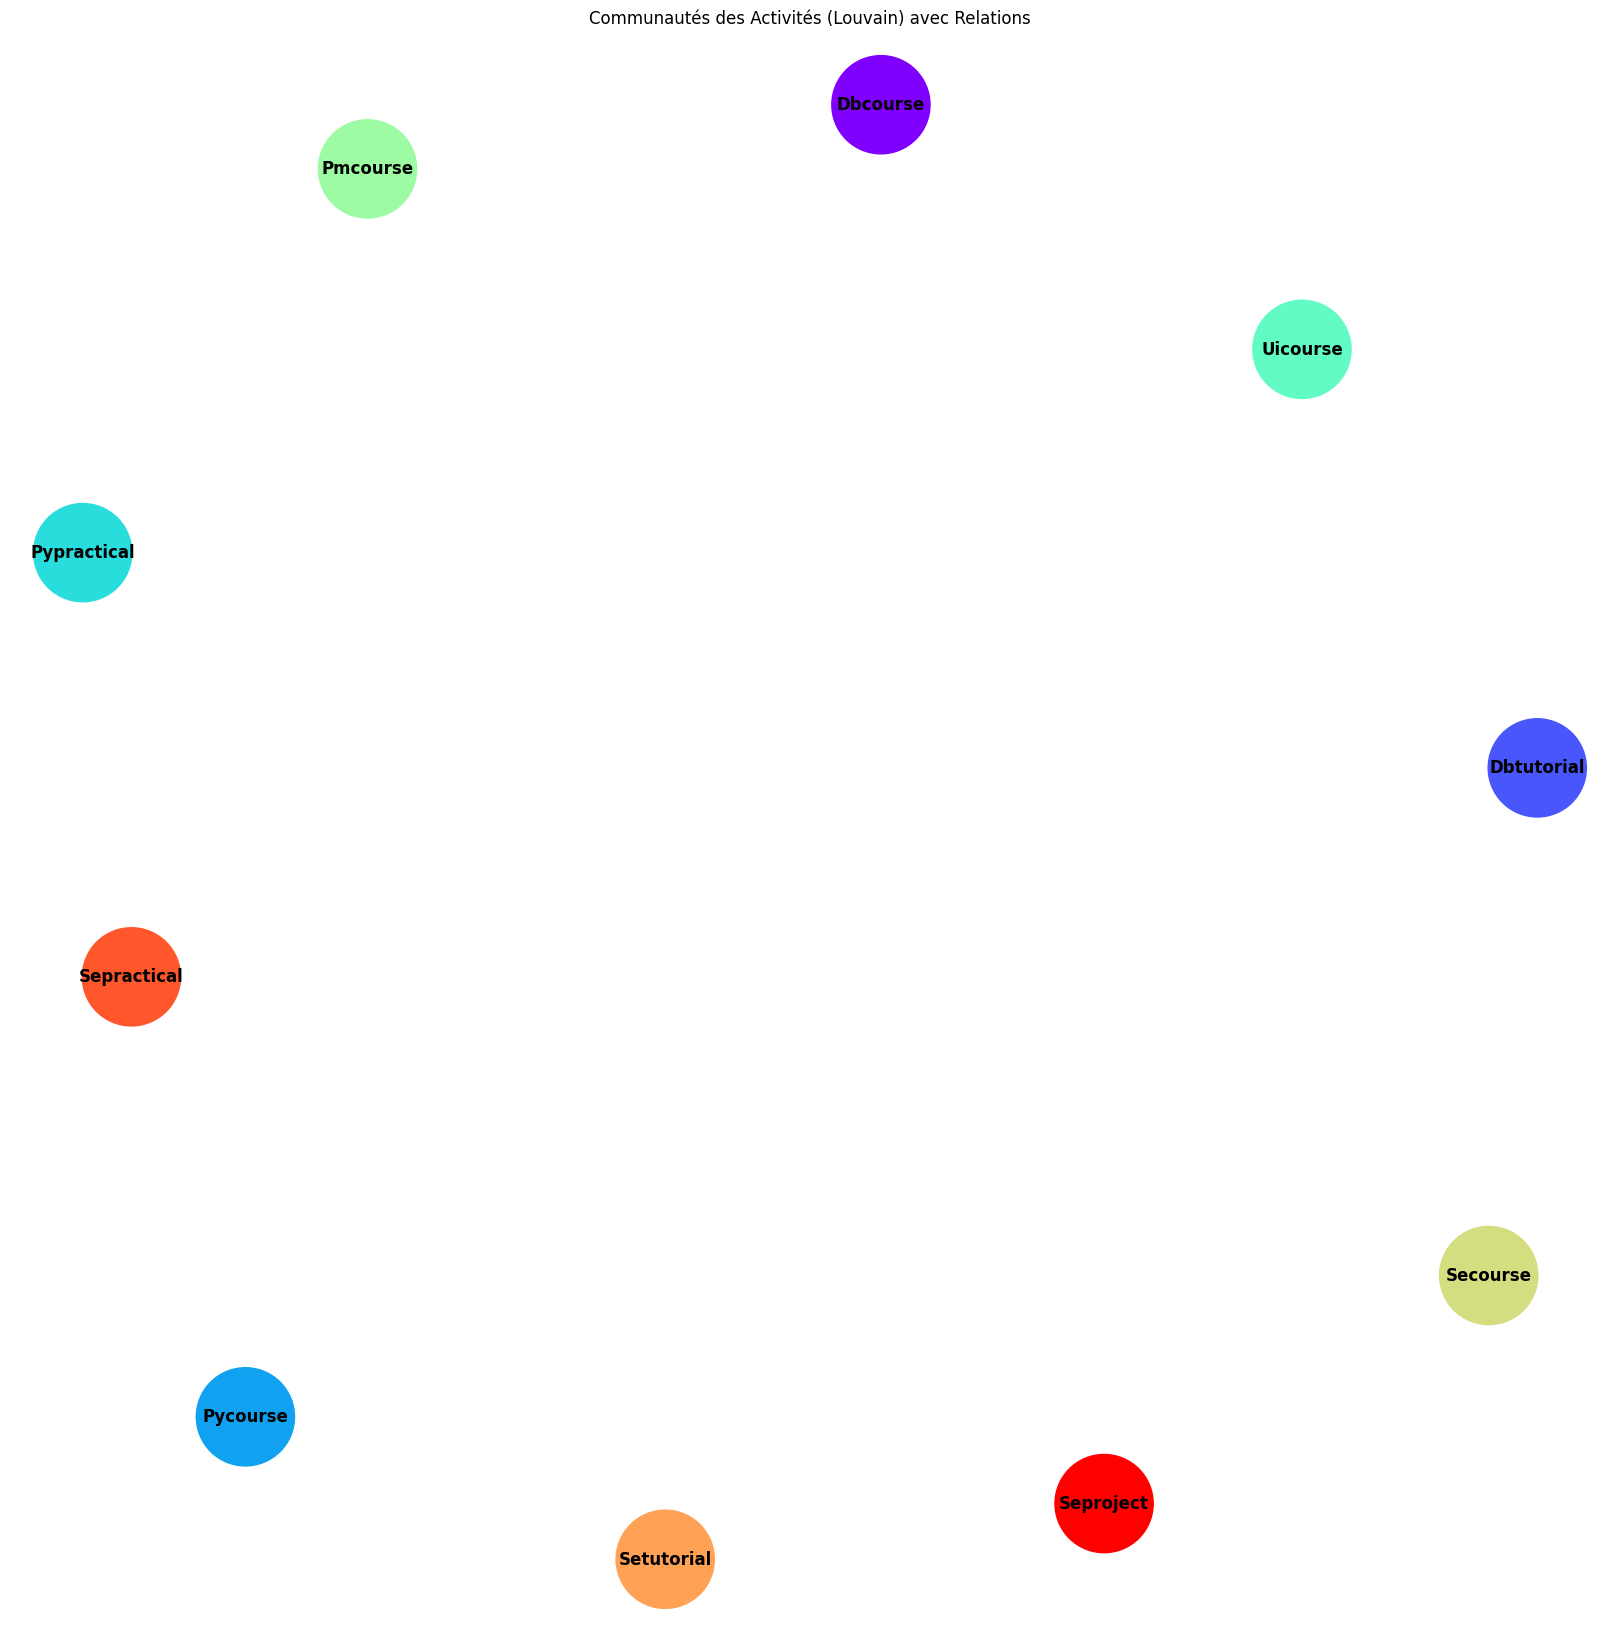

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
import re
import community  # Algorithme de Louvain pour la détection des communautés

# Assurez-vous d'avoir défini les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")  # Namespace des activités
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")  # Namespace des relations

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplacez le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
activities_names = [extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/") for activity in all_activities]

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Ajouter les nœuds pour chaque activité
for activity_name in activities_names:
    G.add_node(activity_name)

# Ajouter des arêtes entre toutes les activités si elles partagent des ressources (à adapter selon le contexte)
for subj, pred, obj in graph:
    if str(pred) == str(tao_namespace.hasName):  # On s'intéresse uniquement aux prédicats 'hasName'
        subj_name = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
        obj_name = extract_name_without_identifiers(str(obj), "http://sonfack.com/2023/12/tao/")

        # Ajouter une arête si les deux noms d'activités sont dans la liste
        if subj_name in activities_names and obj_name in activities_names:
            G.add_edge(subj_name, obj_name)

# Appliquer l'algorithme de Louvain pour détecter les communautés


partition = community.community_louvain.best_partition(G)  # Updated to call best_partition correctly



# Visualiser les communautés
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring pour espacer les nœuds
pos = nx.spring_layout(G, seed=42, k=0.5)

# Extraire les couleurs des communautés
colors = [partition[node] for node in G.nodes()]

# Dessiner le graphe avec des couleurs différentes pour chaque communauté
nx.draw(G, pos, with_labels=True, node_size=5000, node_color=colors, cmap=plt.cm.rainbow, font_size=12, font_weight="bold")

# Ajouter un titre et afficher le graphe
plt.title("Communautés des Activités (Louvain) avec Relations")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


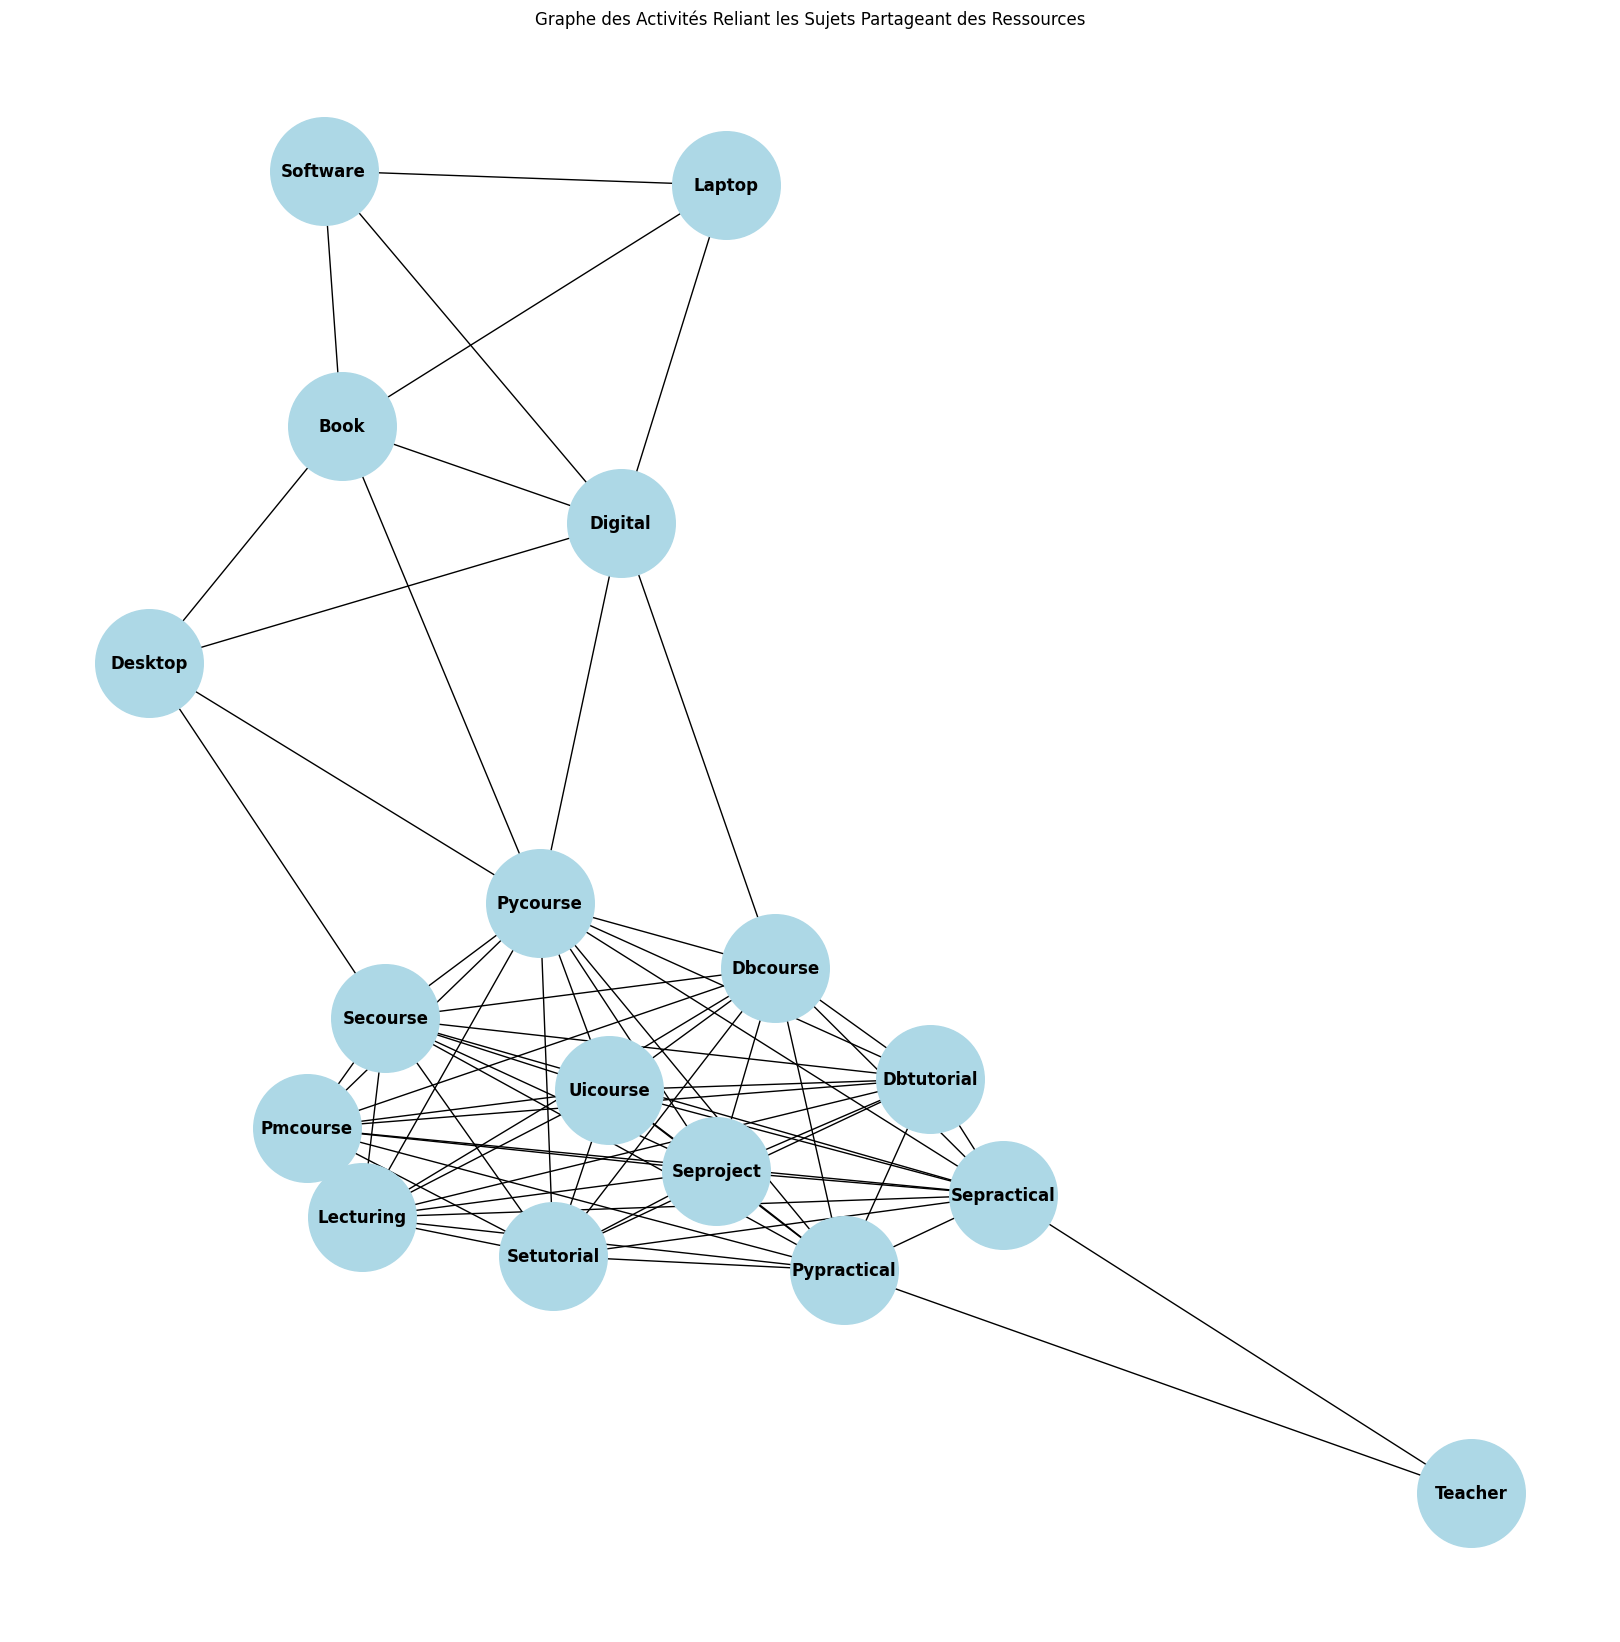

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
from collections import defaultdict

# Définir les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")  # Namespace des activités
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")  # Namespace des relations

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplacez le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités
all_activities = get_all_activities(graph)
activities_names = [extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/") for activity in all_activities]

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Ajouter les nœuds pour chaque activité
for activity_name in activities_names:
    G.add_node(activity_name)

# Créer un dictionnaire pour lier les activités aux objets qu'elles partagent
activity_to_objects = defaultdict(set)

# Parcours des relations dans le graphe pour enregistrer les objets associés à chaque activité
for subj, pred, obj in graph:
    if isinstance(obj, URIRef):  # Se concentrer uniquement sur les objets de type URIRef
        if str(pred).startswith(str(tao_namespace)):  # Filtrer les prédicats pertinents
            subj_name = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
            obj_name = extract_name_without_identifiers(str(obj), "http://sonfack.com/2023/12/tao/")
            activity_to_objects[subj_name].add(obj_name)

# Ajouter des arêtes entre les activités qui partagent une ressource (objet)
for activity1, objects1 in activity_to_objects.items():
    for activity2, objects2 in activity_to_objects.items():
        if activity1 != activity2 and not G.has_edge(activity1, activity2):
            # Vérifier si les deux activités partagent au moins un objet
            if objects1 & objects2:  # Si l'intersection des objets partagés n'est pas vide
                G.add_edge(activity1, activity2)

# Visualisation du graphe
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring pour une meilleure disposition
pos = nx.spring_layout(G, seed=42, k=0.5)

# Dessiner les nœuds et les arêtes avec les noms des activités
nx.draw(G, pos, with_labels=True, node_size=6000, node_color="lightblue", font_size=12, font_weight="bold")

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités Reliant les Sujets Partageant des Ressources")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


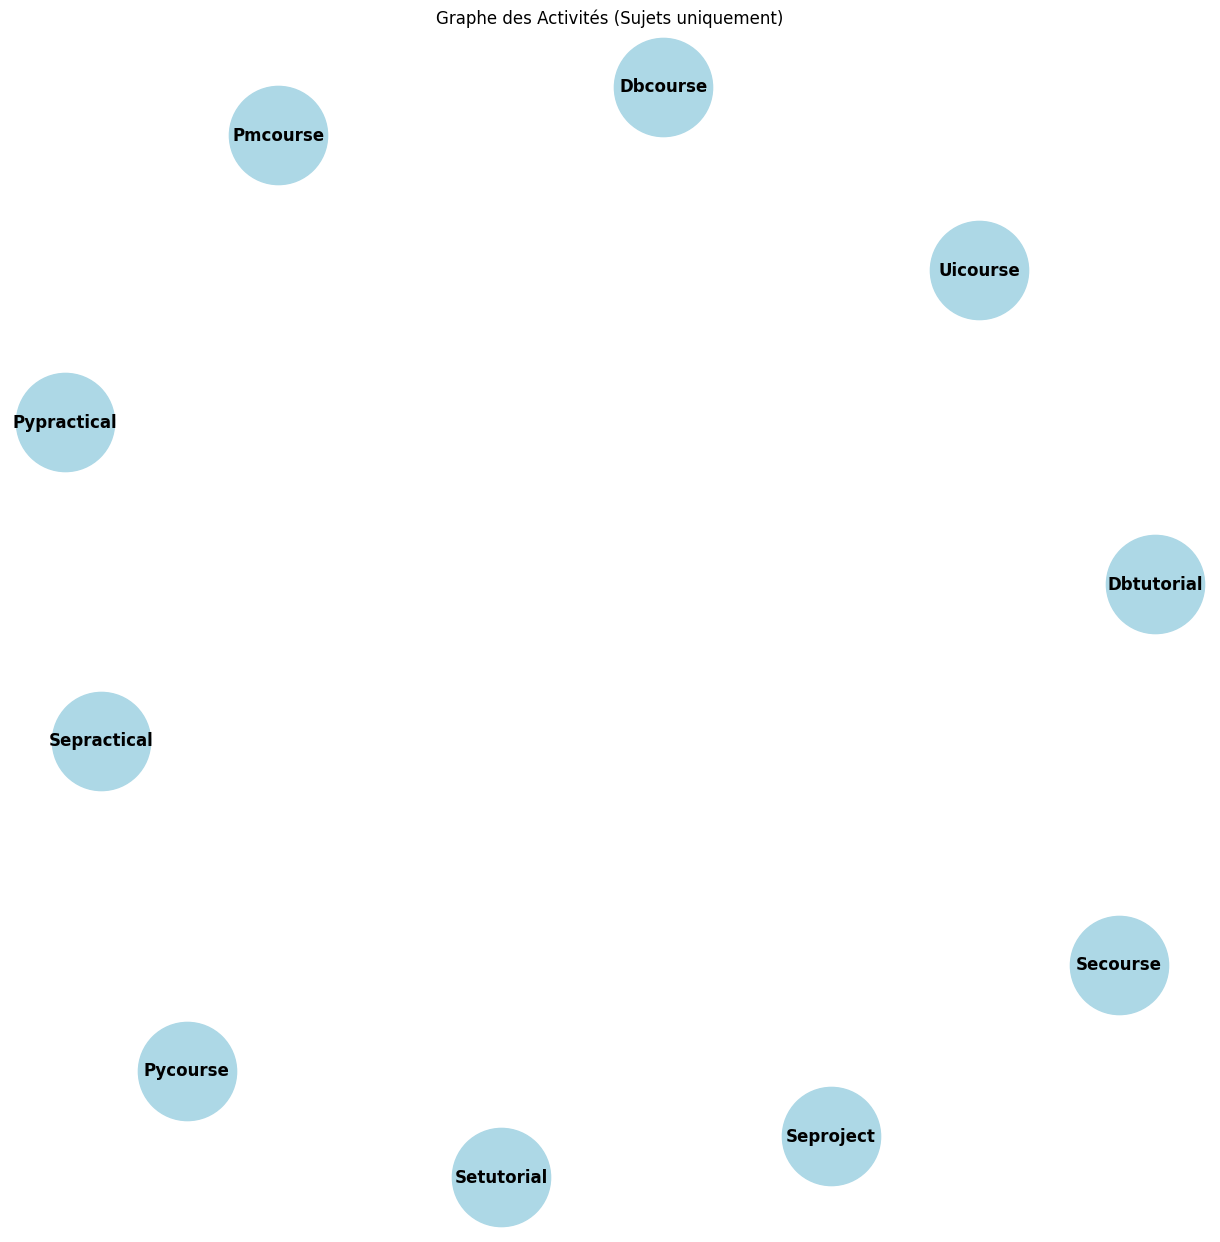

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
import re

# Définir les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")  # Namespace des activités
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")  # Namespace des relations

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplacez le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités (sujets)
all_activities = get_all_activities(graph)
activities_names = [extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/") for activity in all_activities]

# Créer un graphe pour visualiser uniquement les sujets
G = nx.Graph()

# Ajouter les nœuds pour chaque activité (sujet uniquement)
for activity_name in activities_names:
    G.add_node(activity_name)

# Visualisation du graphe avec uniquement les sujets (sans objets ni relations)
plt.figure(figsize=(12, 12))

# Utiliser un layout en spring pour une meilleure disposition
pos = nx.spring_layout(G, seed=42, k=0.5)

# Dessiner les nœuds (activités/sujets) avec leurs noms
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12, font_weight="bold")

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités (Sujets uniquement)")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


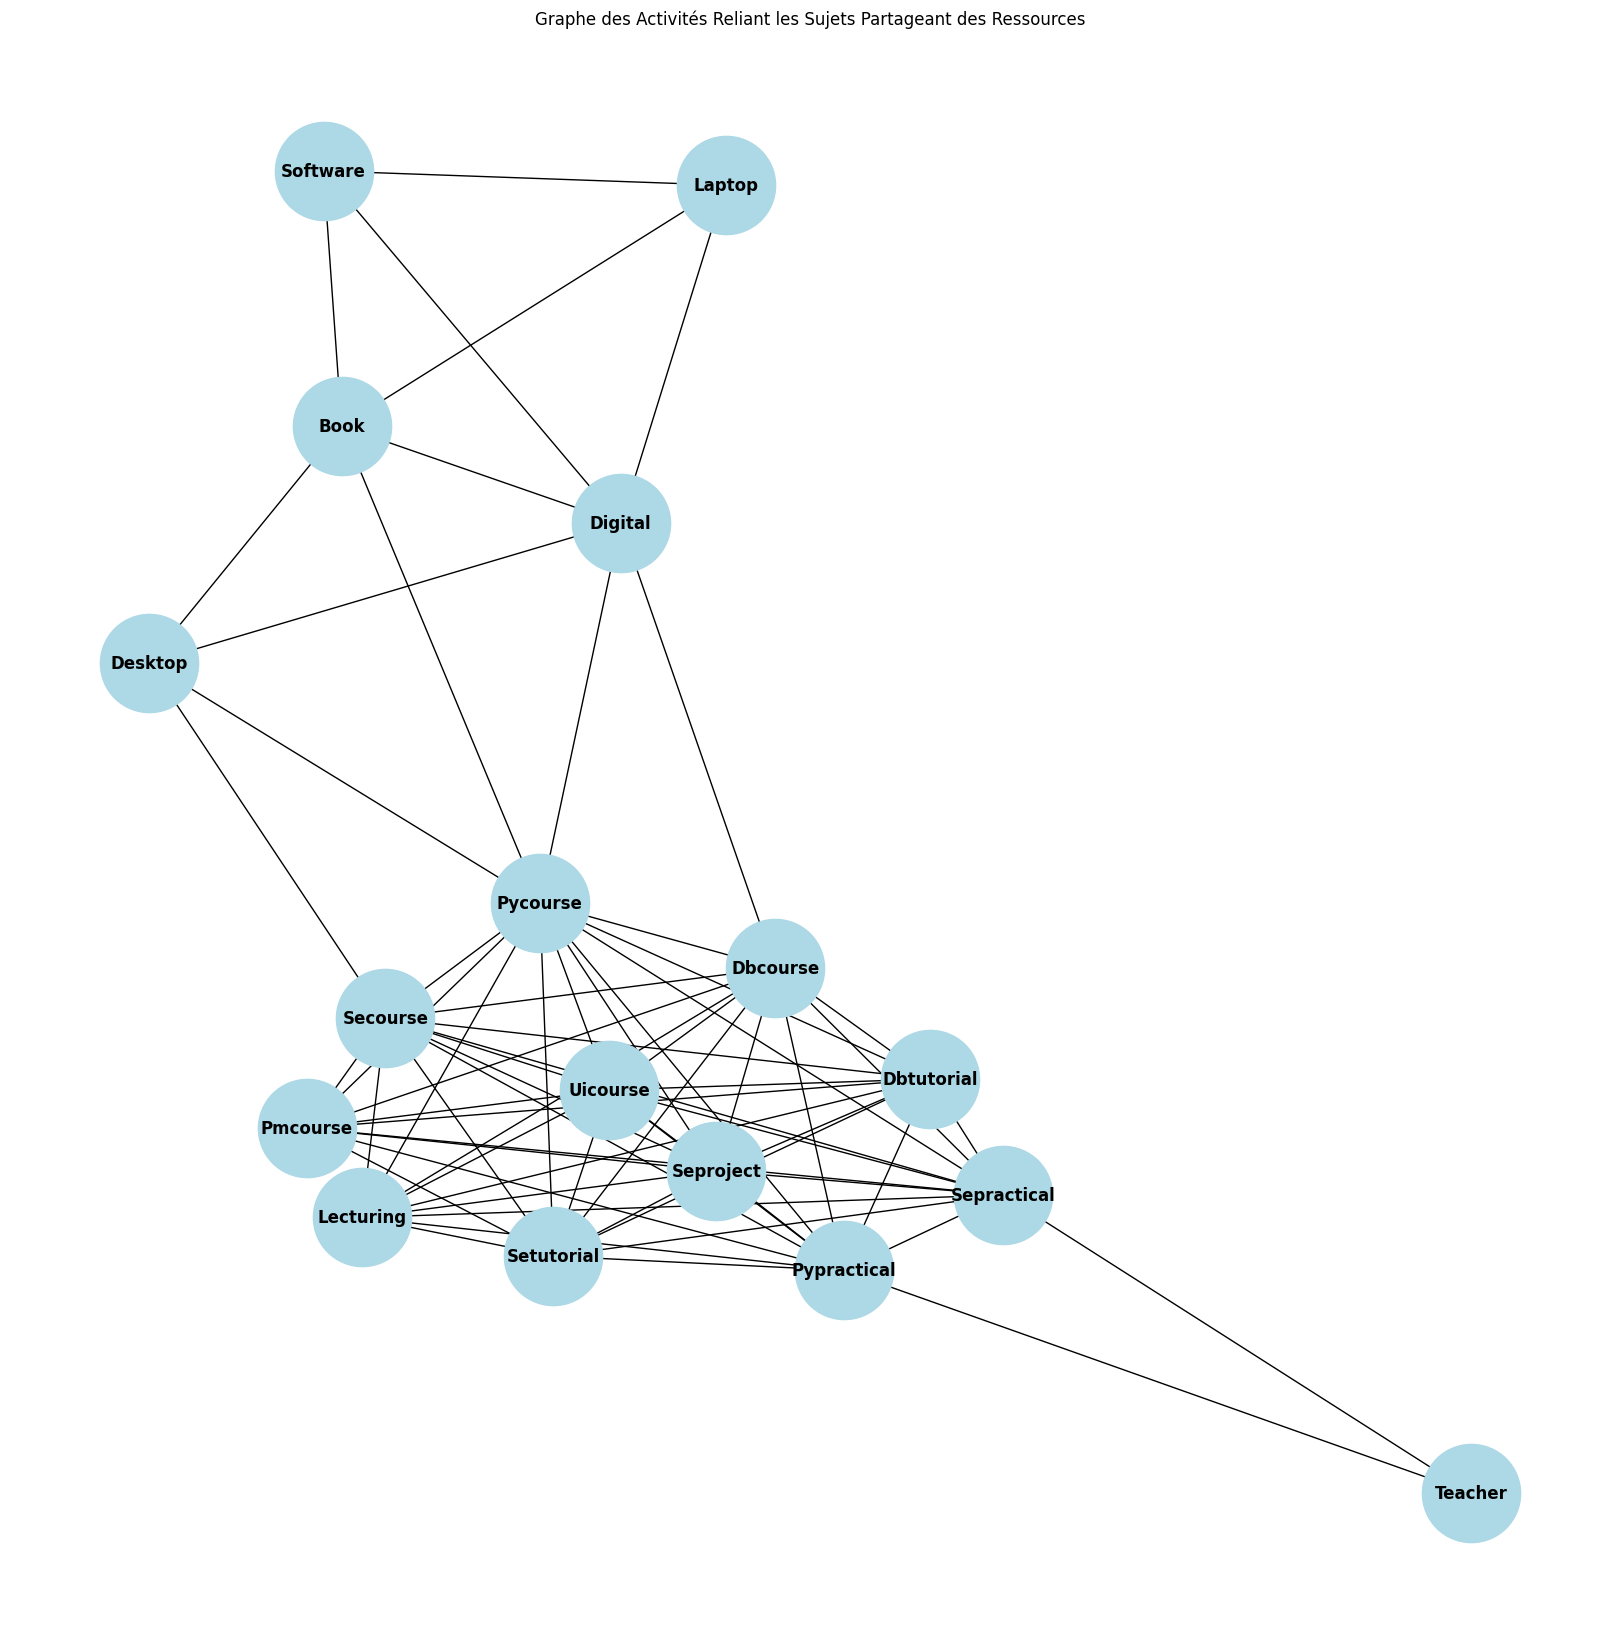

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, RDF, Namespace
import re
from collections import defaultdict

# Définir les namespaces appropriés
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")  # Namespace des activités
tao_namespace = Namespace("http://sonfack.com/2023/12/tao/")  # Namespace des relations

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

# Charger le fichier RDF (remplacez le chemin par le bon fichier)
graph = Graph()
graph.parse("/content/drive/MyDrive/teaching_akg.ttl", format="ttl")

# Récupérer et afficher les noms des activités (sujets)
all_activities = get_all_activities(graph)
activities_names = [extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/") for activity in all_activities]

# Créer un graphe pour visualiser les relations
G = nx.Graph()

# Ajouter les nœuds pour chaque activité (sujet uniquement)
for activity_name in activities_names:
    G.add_node(activity_name)

# Créer un dictionnaire pour lier les activités aux objets qu'elles partagent
activity_to_objects = defaultdict(set)

# Parcours des relations dans le graphe pour enregistrer les objets associés à chaque activité
for subj, pred, obj in graph:
    if isinstance(obj, URIRef):  # Se concentrer uniquement sur les objets de type URIRef
        if str(pred).startswith(str(tao_namespace)):  # Filtrer les prédicats pertinents
            subj_name = extract_name_without_identifiers(str(subj), "http://sonfack.com/2023/12/tao/")
            obj_name = extract_name_without_identifiers(str(obj), "http://sonfack.com/2023/12/tao/")
            activity_to_objects[subj_name].add(obj_name)

# Ajouter des arêtes entre les activités qui partagent une ressource (objet)
for activity1, objects1 in activity_to_objects.items():
    for activity2, objects2 in activity_to_objects.items():
        if activity1 != activity2 and not G.has_edge(activity1, activity2):
            # Vérifier si les deux activités partagent au moins un objet
            if objects1 & objects2:  # Si l'intersection des objets partagés n'est pas vide
                G.add_edge(activity1, activity2)

# Visualisation du graphe avec les relations entre les sujets
plt.figure(figsize=(16, 16))

# Utiliser un layout en spring pour une meilleure disposition
pos = nx.spring_layout(G, seed=42, k=0.5)

# Dessiner les nœuds (activités/sujets) avec leurs noms et les relations (arêtes)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=12, font_weight="bold")

# Ajouter un titre et afficher le graphe
plt.title("Graphe des Activités Reliant les Sujets Partageant des Ressources")
plt.axis('off')  # Désactive les axes pour une présentation plus propre
plt.show()


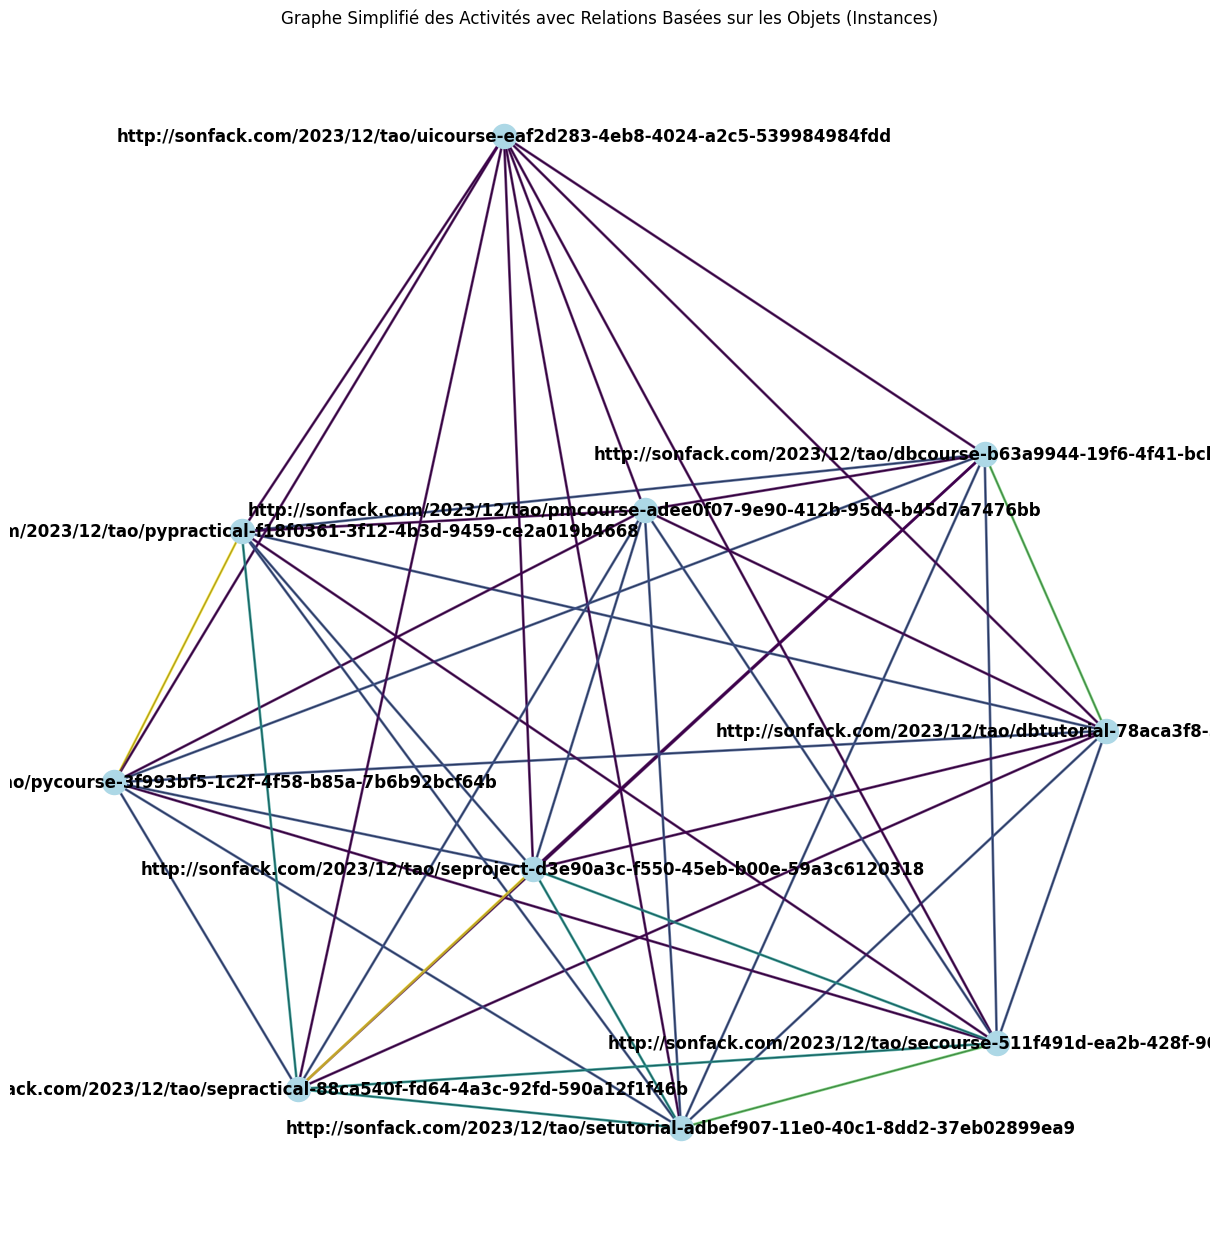

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire les activités du graphe
def read_all_activities(akg: Graph):
    """Retourne toutes les activités d'un graphe de connaissances"""
    return [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les objets associés à une activité (instances)
def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances)"""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

# Fonction pour créer un graphe simplifié
def create_simplified_graph(akg: Graph):
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = read_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        G.add_node(activity)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if common_objects:  # Vérifie si les activités partagent un objet (instance)
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1, activity_2, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié
simplified_graph = create_simplified_graph(graph)

# Visualiser le graphe simplifié
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(simplified_graph, seed=42)

# Obtenir les poids des arêtes
edge_weights = [simplified_graph[u][v]['weight'] for u, v in simplified_graph.edges()]

# Créer une palette de couleurs (une couleur différente pour chaque poids d'arête)
norm = mcolors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
cmap = plt.cm.viridis  # Choisir une palette de couleurs

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction du poids
nx.draw(simplified_graph, pos, with_labels=True, node_size=300, node_color="lightblue", font_size=12, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color=edge_weights, edge_cmap=cmap, alpha=0.7)


# Afficher le graphe
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)")
plt.show()


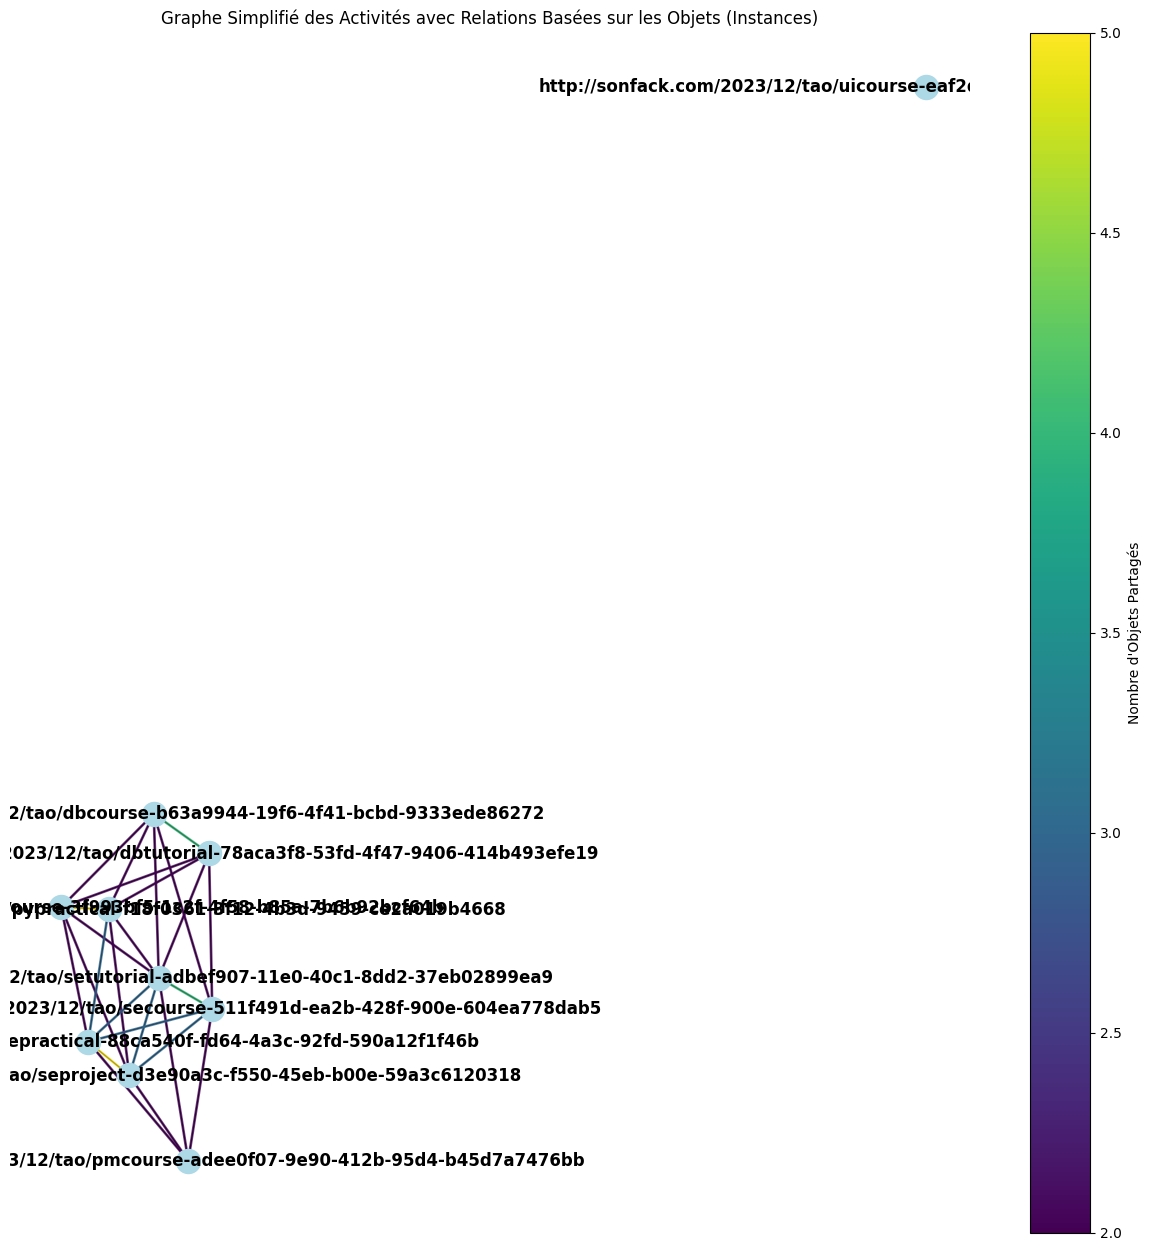

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire les activités du graphe (en utilisant uniquement les noms des sujets)
def read_all_activities(akg: Graph):
    """Retourne toutes les activités du graphe de connaissances"""
    return [str(activity.split('#')[-1]) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]


# Fonction pour créer un graphe simplifié
def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """
    Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés.
    Affiche uniquement les relations entre activités partageant un certain nombre minimum d'objets.

    Args:
        akg (Graph): Le graphe RDF des connaissances.
        min_shared_objects (int): Le nombre minimum d'objets partagés pour qu'une relation soit affichée.

    Retourne:
        G (Graph): Le graphe simplifié avec des arêtes filtrées.
    """
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = read_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        G.add_node(activity)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1, activity_2, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Visualiser le graphe simplifié
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(simplified_graph, seed=42)

# Obtenir les poids des arêtes
edge_weights = [simplified_graph[u][v]['weight'] for u, v in simplified_graph.edges()]


# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction du poids
nx.draw(simplified_graph, pos, with_labels=True, node_size=300, node_color="lightblue", font_size=12, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color=edge_weights, edge_cmap=cmap, alpha=0.7)

# Créer un axe pour la colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Créer un axe pour la colorbar et l'afficher
ax = plt.gca()  # Récupérer l'axe actuel
plt.colorbar(sm, label="Nombre d'Objets Partagés", ax=ax)

# Afficher le graphe
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)")
plt.show()


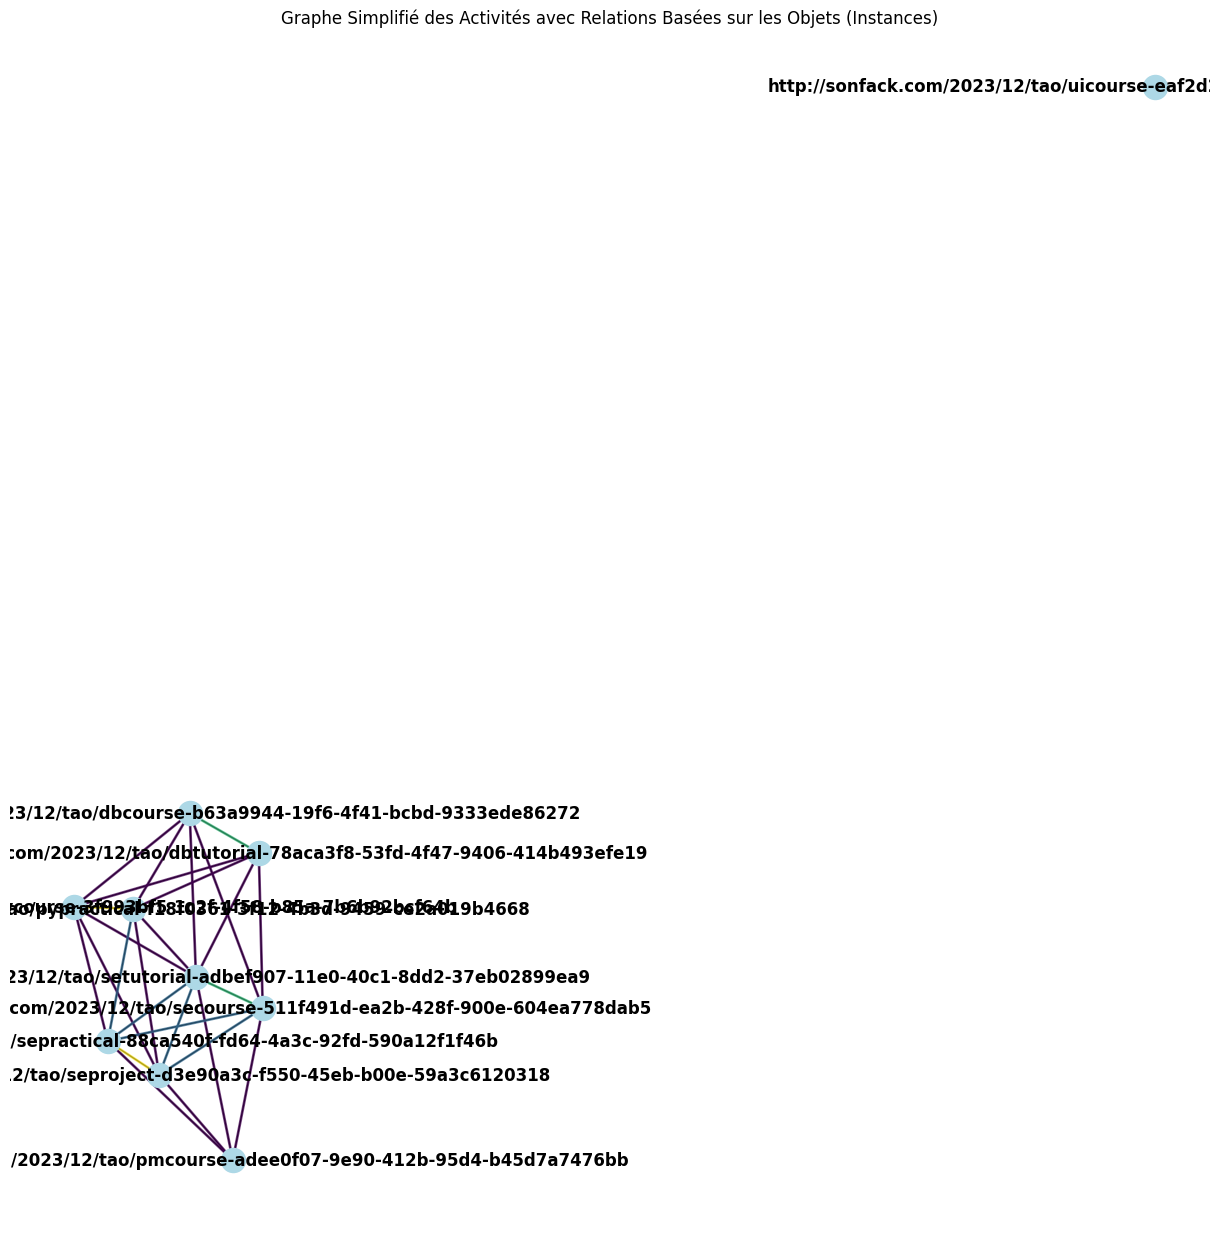

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire les activités du graphe (en utilisant uniquement les noms des sujets, sans URI)
def read_all_activities(akg: Graph):
    """
    Retourne toutes les activités du graphe de connaissances en utilisant uniquement les noms des sujets
    (sans URI, uniquement la partie après le dernier '#').
    """
    return [activity.split('#')[-1] for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les objets associés à une activité (instances), en extrayant uniquement les noms
def get_activity_objects(akg: Graph, activity_uri: str):
    """
    Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir
    uniquement les noms des objets.
    """
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

# Fonction pour créer un graphe simplifié
def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """
    Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés.
    Affiche uniquement les relations entre activités partageant un certain nombre minimum d'objets.

    Args:
        akg (Graph): Le graphe RDF des connaissances.
        min_shared_objects (int): Le nombre minimum d'objets partagés pour qu'une relation soit affichée.

    Retourne:
        G (Graph): Le graphe simplifié avec des arêtes filtrées.
    """
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = read_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        G.add_node(activity)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1, activity_2, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Visualiser le graphe simplifié
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(simplified_graph, seed=42)

# Obtenir les poids des arêtes
edge_weights = [simplified_graph[u][v]['weight'] for u, v in simplified_graph.edges()]

# Créer une palette de couleurs (une couleur différente pour chaque poids d'arête)
norm = mcolors.Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
cmap = plt.cm.viridis  # Choisir une palette de couleurs

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction du poids
nx.draw(simplified_graph, pos, with_labels=True, node_size=300, node_color="lightblue", font_size=12, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color=edge_weights, edge_cmap=cmap, alpha=0.7)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)")
plt.show()


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


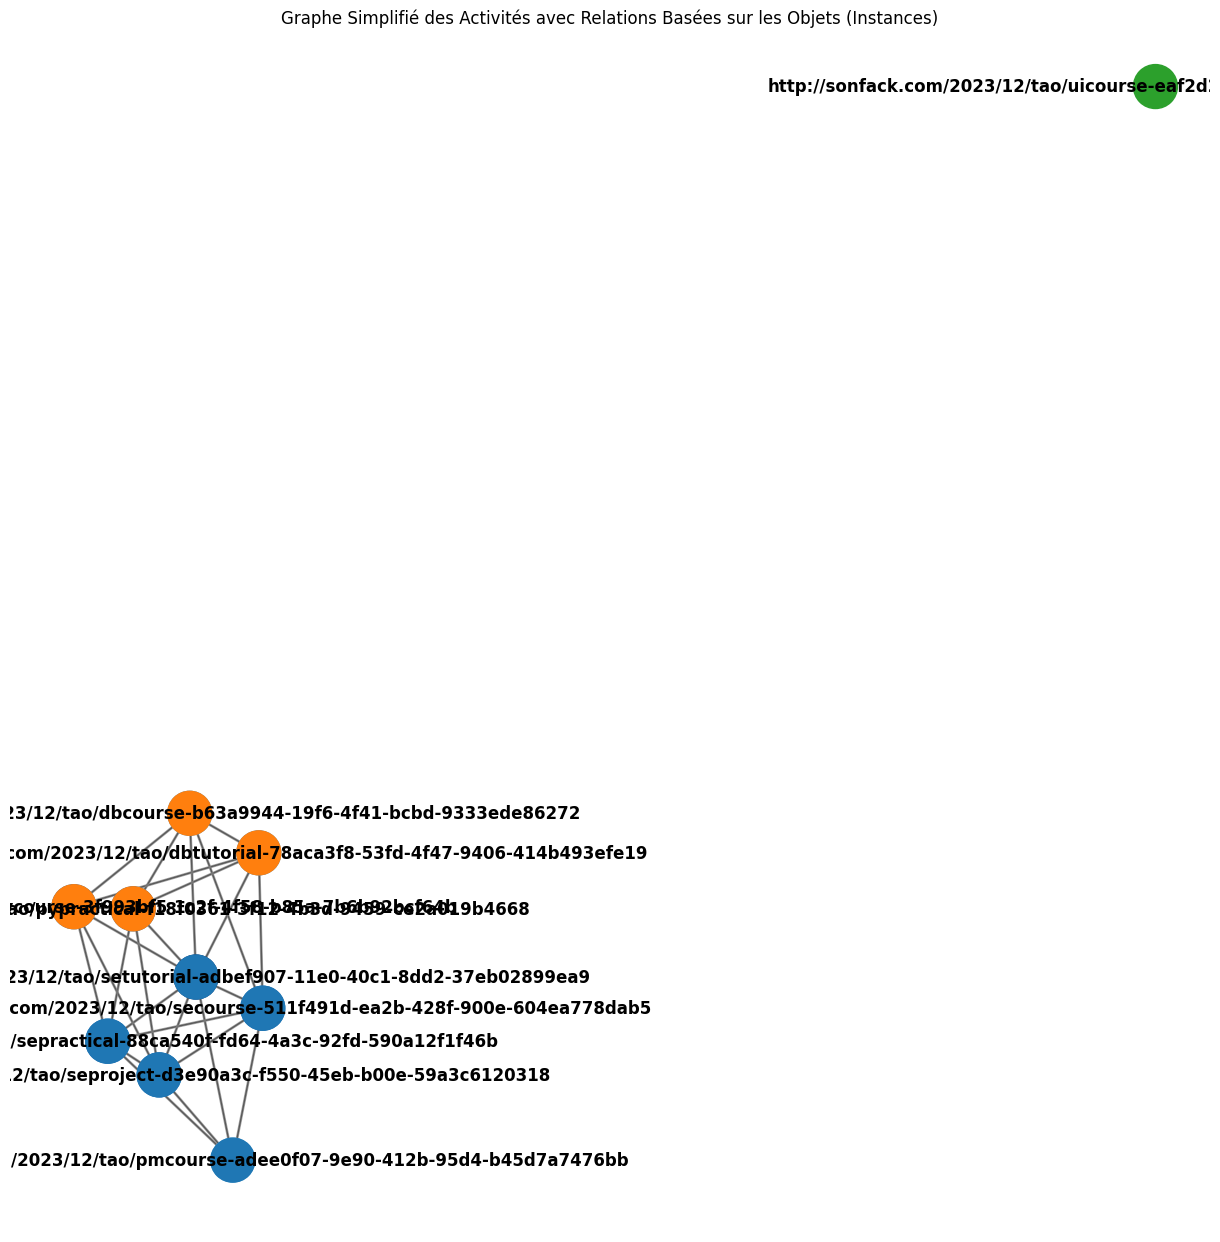

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors
import community as community_louvain  # Assurez-vous d'avoir installé python-louvain pour la détection de communautés

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

# Fonction pour extraire les activités du graphe (en utilisant uniquement les noms des sujets, sans URI)
def read_all_activities(akg: Graph):
    """Retourne toutes les activités du graphe de connaissances en utilisant uniquement les noms des sujets."""
    return [activity.split('#')[-1] for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]

# Fonction pour obtenir les objets associés à une activité (instances), en extrayant uniquement les noms
def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir uniquement les noms des objets."""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

# Fonction pour créer un graphe simplifié
def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """
    Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés.
    Affiche uniquement les relations entre activités partageant un certain nombre minimum d'objets.

    Args:
        akg (Graph): Le graphe RDF des connaissances.
        min_shared_objects (int): Le nombre minimum d'objets partagés pour qu'une relation soit affichée.

    Retourne:
        G (Graph): Le graphe simplifié avec des arêtes filtrées.
    """
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = read_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        G.add_node(activity)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1, activity_2, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Calcul de la centralité de degré (les nœuds les plus connectés auront une couleur similaire)
degree_centrality = nx.degree_centrality(simplified_graph)

# Normalisation de la centralité pour les couleurs
node_color = [degree_centrality[node] for node in simplified_graph.nodes()]

# Détection des communautés
partition = community.community_louvain.best_partition(simplified_graph.to_undirected())

# Visualiser le graphe simplifié
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(simplified_graph, seed=42)

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction de la centralité
nx.draw(simplified_graph, pos, with_labels=True, node_size=1000, node_color=node_color, cmap=plt.cm.Blues, font_size=12, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color="gray", alpha=0.7)

# Afficher les communautés
community_colors = [f"C{partition[node] % 10}" for node in simplified_graph.nodes()]
nx.draw_networkx_nodes(simplified_graph, pos, node_color=community_colors, node_size=1000, cmap=plt.cm.Set1)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)")
plt.show()


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


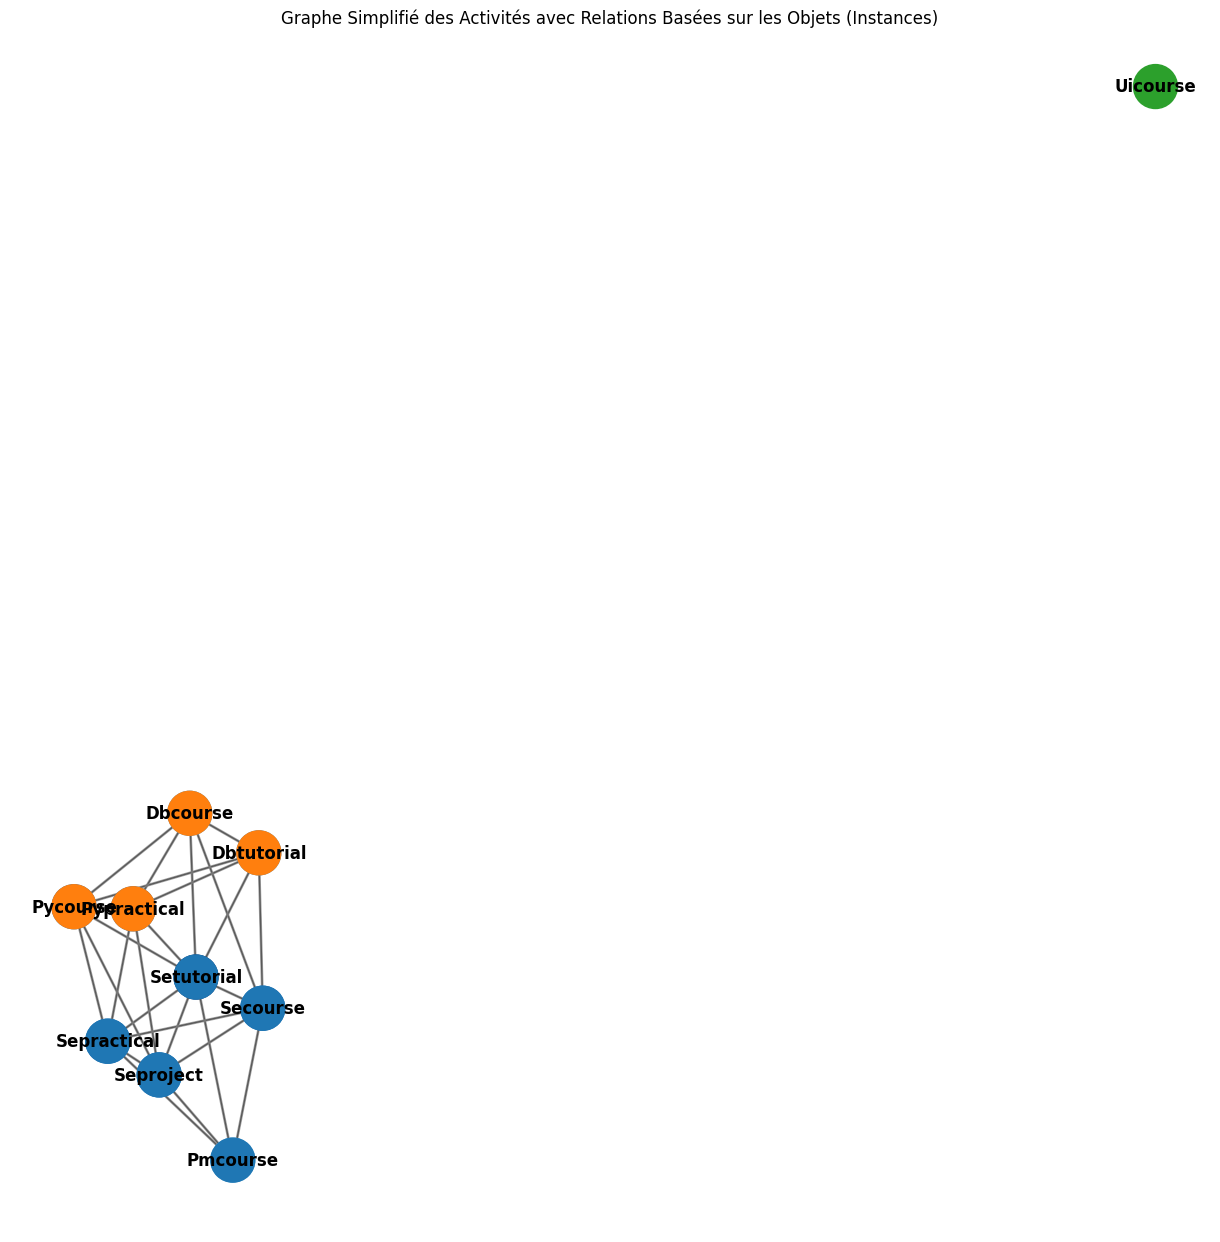

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors
import community as community_louvain
import re

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir
    uniquement les noms des objets."""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés."""
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = get_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
        G.add_node(activity_name)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Extraire les noms des sujets sans les identifiants de l'URI
                activity_1_name = extract_name_without_identifiers(activity_1, "http://sonfack.com/2023/12/tao/")
                activity_2_name = extract_name_without_identifiers(activity_2, "http://sonfack.com/2023/12/tao/")
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1_name, activity_2_name, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Calcul de la centralité de degré (les nœuds les plus connectés auront une couleur similaire)
degree_centrality = nx.degree_centrality(simplified_graph)

# Normalisation de la centralité pour les couleurs
node_color = [degree_centrality[node] for node in simplified_graph.nodes()]

# Détection des communautés
partition = community.community_louvain.best_partition(simplified_graph.to_undirected())

# Visualiser le graphe simplifié
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(simplified_graph, seed=42)

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction de la centralité
nx.draw(simplified_graph, pos, with_labels=True, node_size=1000, node_color=node_color, cmap=plt.cm.Blues, font_size=12, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color="gray", alpha=0.7)

# Afficher les communautés
community_colors = [f"C{partition[node] % 10}" for node in simplified_graph.nodes()]
nx.draw_networkx_nodes(simplified_graph, pos, node_color=community_colors, node_size=1000, cmap=plt.cm.Set1)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)")
plt.show()


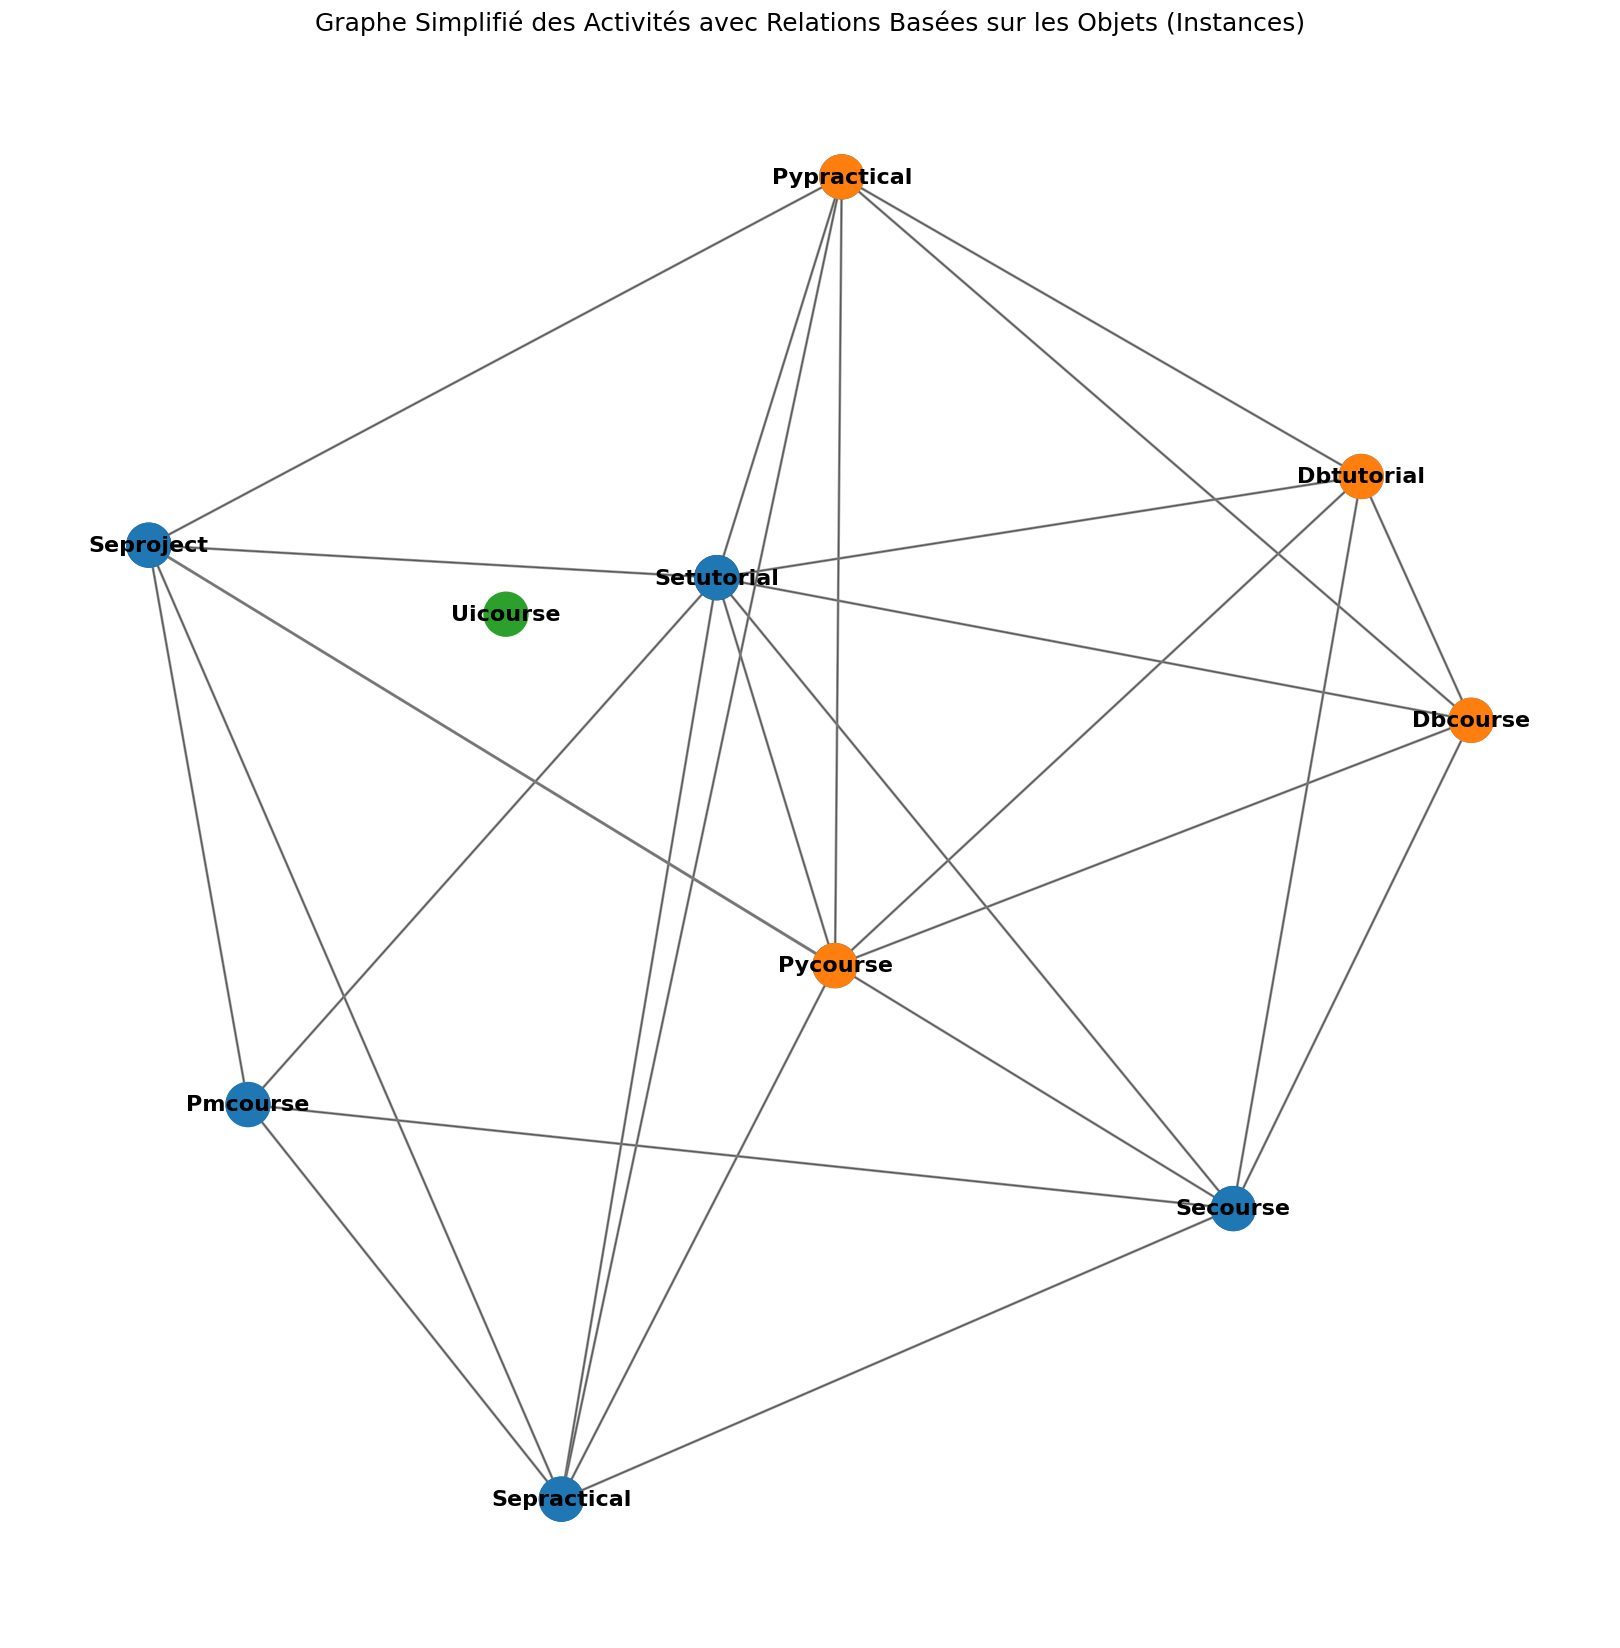

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors
import community as community_louvain
import re

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir
    uniquement les noms des objets."""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés."""
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = get_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
        G.add_node(activity_name)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Extraire les noms des sujets sans les identifiants de l'URI
                activity_1_name = extract_name_without_identifiers(activity_1, "http://sonfack.com/2023/12/tao/")
                activity_2_name = extract_name_without_identifiers(activity_2, "http://sonfack.com/2023/12/tao/")
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1_name, activity_2_name, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Calcul de la centralité de degré (les nœuds les plus connectés auront une couleur similaire)
degree_centrality = nx.degree_centrality(simplified_graph)

# Normalisation de la centralité pour les couleurs
node_color = [degree_centrality[node] for node in simplified_graph.nodes()]

# Détection des communautés
partition =community.community_louvain.best_partition(simplified_graph.to_undirected())

# Visualiser le graphe simplifié
plt.figure(figsize=(16, 16))  # Augmentation de la taille de la figure pour une meilleure lisibilité

# Utilisation de kamada_kawai_layout pour mieux gérer les nœuds isolés
pos = nx.kamada_kawai_layout(simplified_graph, weight='weight')

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction de la centralité
nx.draw(simplified_graph, pos, with_labels=True, node_size=1000, node_color=node_color, cmap=plt.cm.Blues, font_size=16, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color="gray", alpha=0.7)

# Afficher les communautés
community_colors = [f"C{partition[node] % 10}" for node in simplified_graph.nodes()]
nx.draw_networkx_nodes(simplified_graph, pos, node_color=community_colors, node_size=1000, cmap=plt.cm.Set1)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)", fontsize=18)
plt.show()


/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


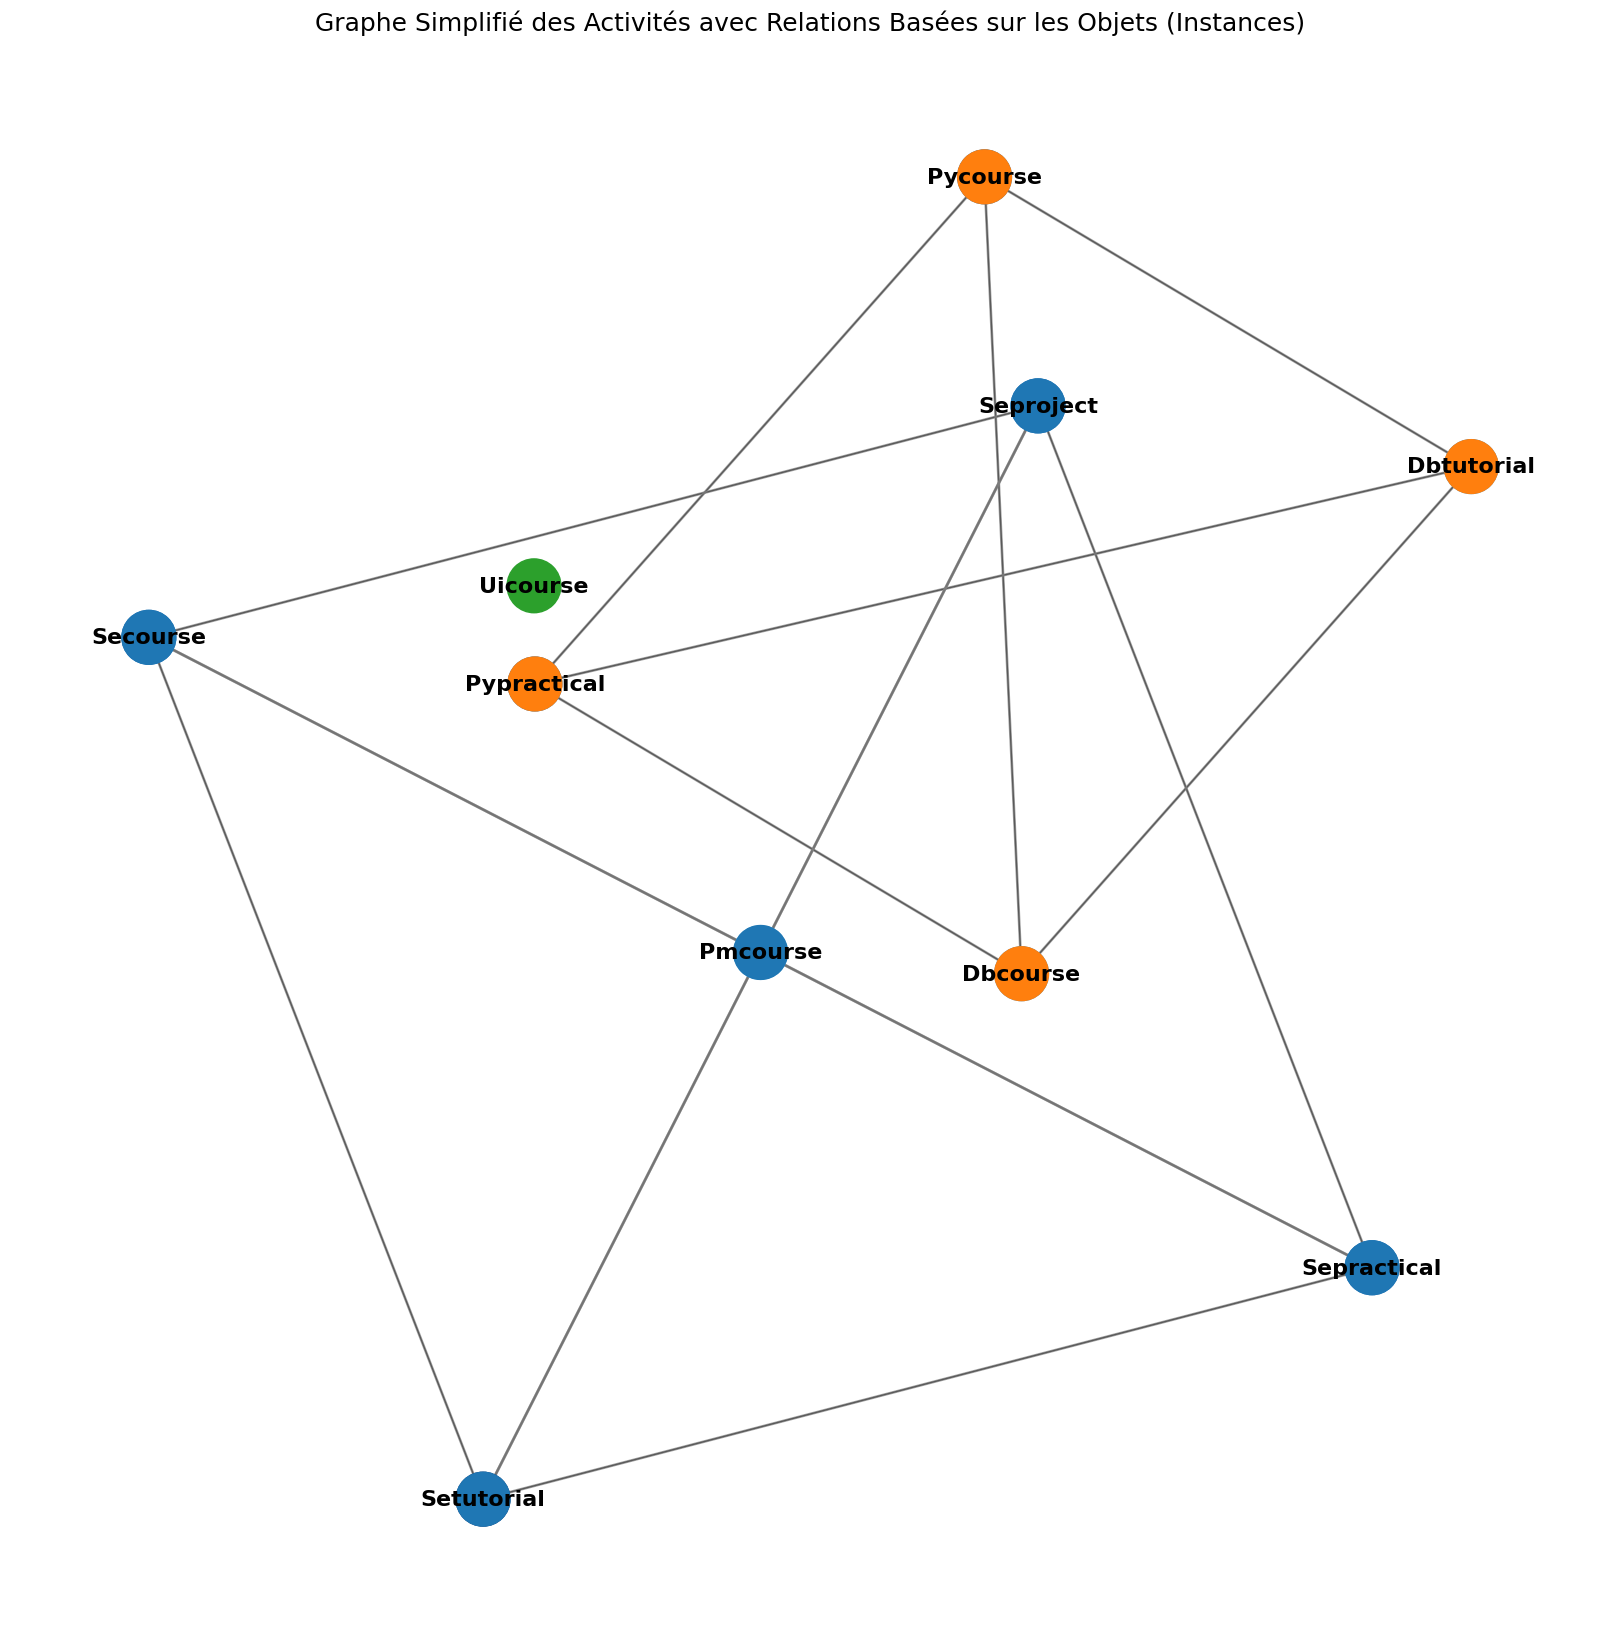

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import matplotlib.colors as mcolors
import community as community_louvain
import re

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir
    uniquement les noms des objets."""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés."""
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = get_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
        G.add_node(activity_name)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Extraire les noms des sujets sans les identifiants de l'URI
                activity_1_name = extract_name_without_identifiers(activity_1, "http://sonfack.com/2023/12/tao/")
                activity_2_name = extract_name_without_identifiers(activity_2, "http://sonfack.com/2023/12/tao/")
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1_name, activity_2_name, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Calcul de la centralité de degré (les nœuds les plus connectés auront une couleur similaire)
degree_centrality = nx.degree_centrality(simplified_graph)

# Normalisation de la centralité pour les couleurs
node_color = [degree_centrality[node] for node in simplified_graph.nodes()]

# Détection des communautés
partition = community.community_louvain.best_partition(simplified_graph.to_undirected())

# Filtrer les arêtes : Conserver uniquement celles qui relient des nœuds appartenant à la même communauté
edges_to_remove = []
for u, v in simplified_graph.edges():
    if partition[u] != partition[v]:
        edges_to_remove.append((u, v))

simplified_graph.remove_edges_from(edges_to_remove)

# Visualiser le graphe simplifié avec uniquement les arêtes communautaires
plt.figure(figsize=(16, 16))  # Augmentation de la taille de la figure pour une meilleure lisibilité

# Utilisation de kamada_kawai_layout pour mieux gérer les nœuds isolés
pos = nx.kamada_kawai_layout(simplified_graph, weight='weight')

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction de la centralité
nx.draw(simplified_graph, pos, with_labels=True, node_size=1500, node_color=node_color, cmap=plt.cm.Blues, font_size=16, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color="gray", alpha=0.7)

# Afficher les communautés
community_colors = [f"C{partition[node] % 10}" for node in simplified_graph.nodes()]
nx.draw_networkx_nodes(simplified_graph, pos, node_color=community_colors, node_size=1500, cmap=plt.cm.Set1)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)", fontsize=18)
plt.show()


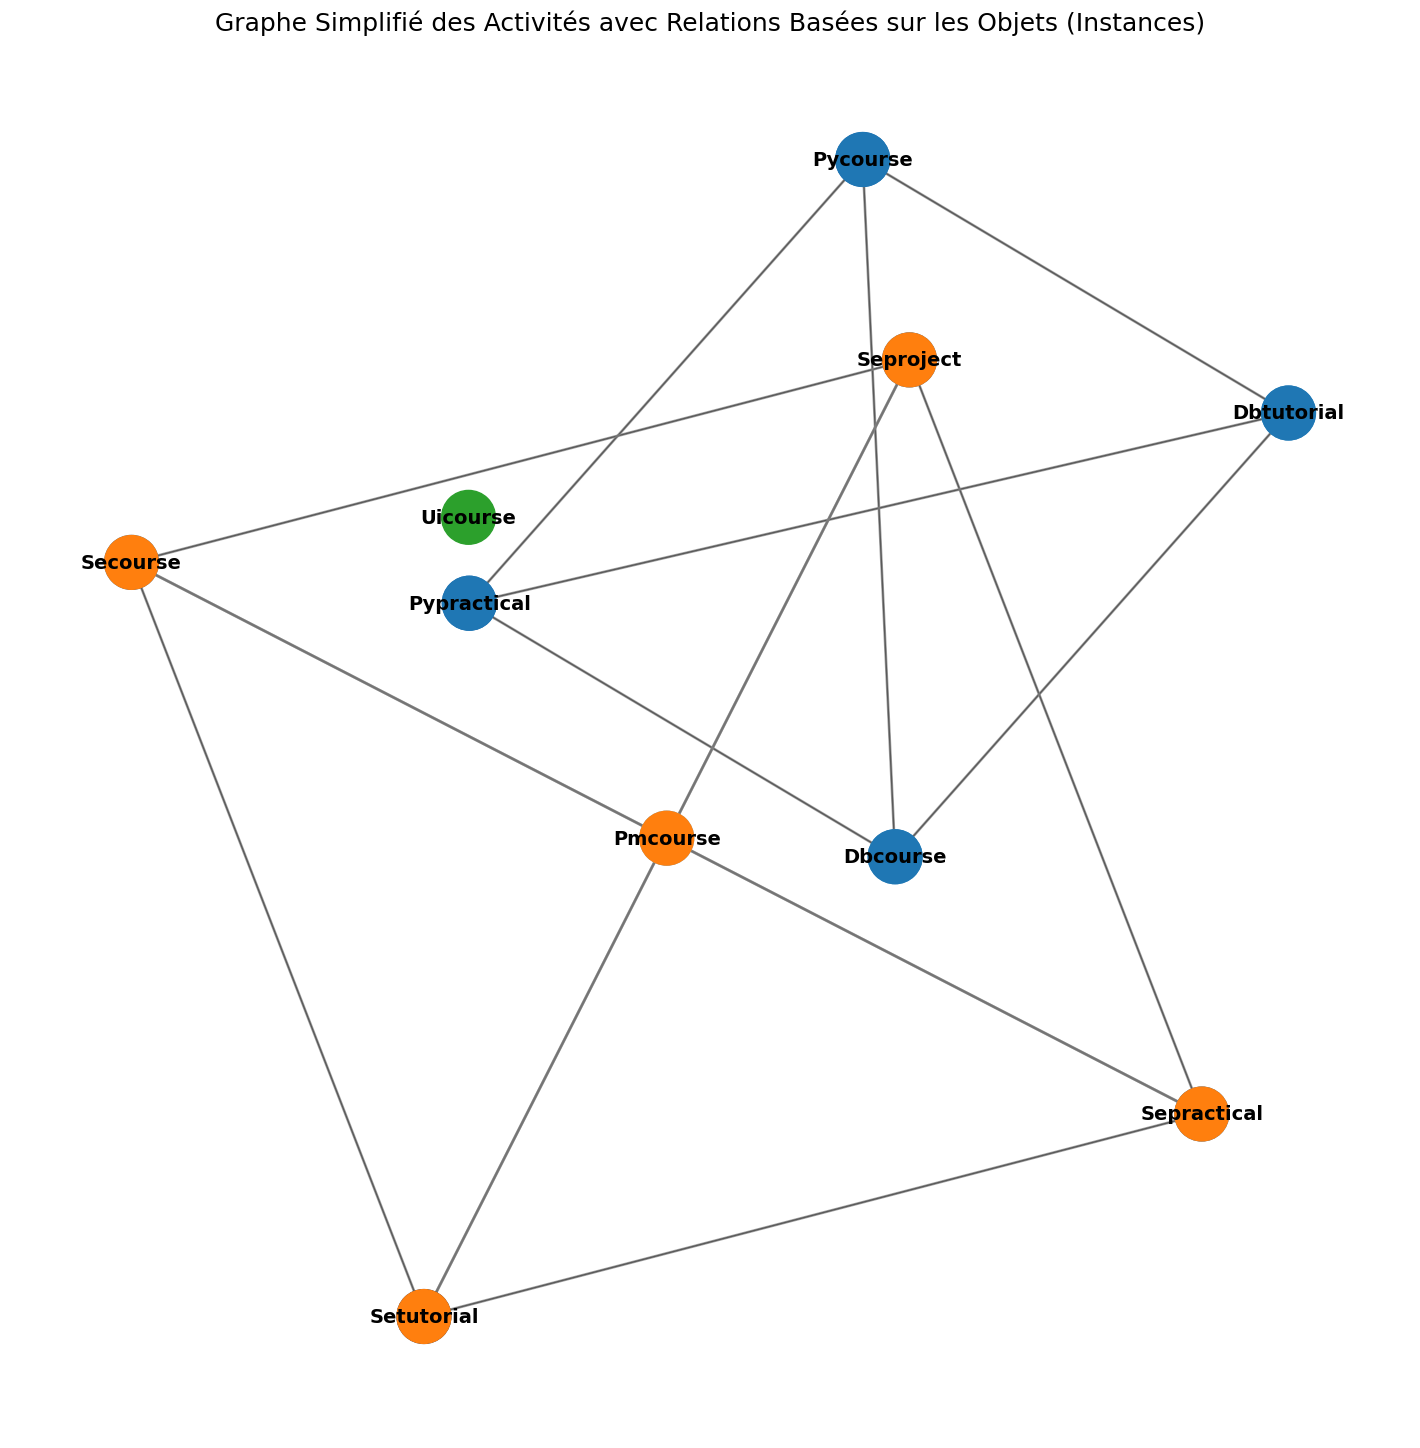

In [ ]:
import community as community_louvain
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, URIRef, Namespace, RDF
import re

# Chargement du graphe RDF
akg_file = "/content/drive/MyDrive/teaching_akg.ttl"
graph = Graph()
graph.parse(akg_file)

# Définir les namespaces
akg_namespace = Namespace("http://sonfack.com/2023/12/tao/")
cao_namespace = Namespace("http://sonfack.com/2023/12/cao/")

def get_all_activities(akg: Graph) -> list:
    """Retourne une liste de toutes les activités dans le graphe RDF."""
    activities = [str(activity) for activity in akg.subjects(predicate=RDF.type, object=cao_namespace.Activity, unique=True)]
    return activities

def extract_name_without_identifiers(uri: str, namespace: str) -> str:
    """Extrait le nom de l'activité sans les identifiants de l'URI après le namespace."""
    match = re.match(f"{re.escape(namespace)}(.+?)(?:[-_].*)?$", uri)
    if match:
        name_without_identifiers = match.group(1).replace('-', ' ').replace('_', ' ').title()
        return name_without_identifiers
    return uri

def get_activity_objects(akg: Graph, activity_uri: str):
    """Retourne tous les objets associés à une activité (instances) sans URI, en utilisant split pour obtenir
    uniquement les noms des objets."""
    activity_uri_ref = URIRef(activity_uri)
    return [str(obj.split('#')[-1]) if isinstance(obj, URIRef) else str(obj) for _, _, obj in akg.triples((activity_uri_ref, None, None))]

def create_simplified_graph(akg: Graph, min_shared_objects=2):
    """Crée un graphe simplifié où les nœuds sont des activités (noms des sujets) et les arêtes sont basées sur des objets partagés."""
    G = nx.Graph()  # Graphe non dirigé pour simplifier la visualisation

    # Lire toutes les activités
    activities = get_all_activities(akg)

    # Ajouter des nœuds pour chaque activité
    for activity in activities:
        activity_name = extract_name_without_identifiers(activity, "http://sonfack.com/2023/12/tao/")
        G.add_node(activity_name)

    # Créer des liens entre les activités qui partagent des objets
    for i, activity_1 in enumerate(activities):
        objects_1 = set(get_activity_objects(akg, activity_1))  # Objets associés à activity_1
        for activity_2 in activities[i+1:]:
            objects_2 = set(get_activity_objects(akg, activity_2))  # Objets associés à activity_2
            common_objects = objects_1 & objects_2  # Objets communs
            if len(common_objects) >= min_shared_objects:  # Filtrer selon le nombre minimum d'objets partagés
                # Extraire les noms des sujets sans les identifiants de l'URI
                activity_1_name = extract_name_without_identifiers(activity_1, "http://sonfack.com/2023/12/tao/")
                activity_2_name = extract_name_without_identifiers(activity_2, "http://sonfack.com/2023/12/tao/")
                # Ajouter une arête entre activity_1 et activity_2 avec un attribut "weight" basé sur le nombre d'objets partagés
                G.add_edge(activity_1_name, activity_2_name, weight=len(common_objects), common_objects=common_objects)

    return G

# Créer le graphe simplifié avec un seuil d'objets partagés minimum
simplified_graph = create_simplified_graph(graph, min_shared_objects=2)  # Seuillage à 2 objets partagés minimum

# Calcul de la centralité de degré (les nœuds les plus connectés auront une couleur similaire)
degree_centrality = nx.degree_centrality(simplified_graph)

# Normalisation de la centralité pour les couleurs
node_color = [degree_centrality[node] for node in simplified_graph.nodes()]

# Détection des communautés
partition = community.community_louvain.best_partition(simplified_graph.to_undirected())

# Filtrer les arêtes : Conserver uniquement celles qui relient des nœuds appartenant à la même communauté
edges_to_remove = []
for u, v in simplified_graph.edges():
    if partition[u] != partition[v]:
        edges_to_remove.append((u, v))

simplified_graph.remove_edges_from(edges_to_remove)

# Créer un dictionnaire des positions des nœuds
communities = {}
for node, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(node)

# Ajuster les positions des communautés pour les séparer
community_positions = {}
offset_x = 0
offset_y = 0
community_spacing = 2  # Réduire l'espacement entre les communautés

for community_id, nodes in communities.items():
    # Appliquer un décalage pour chaque communauté
    for node in nodes:
        community_positions[node] = (offset_x, offset_y)

    # Ajouter un décalage pour la prochaine communauté
    offset_x += community_spacing
    offset_y += community_spacing


# Visualiser le graphe simplifié avec uniquement les arêtes communautaires
plt.figure(figsize=(14, 14))  # Augmentation de la taille de la figure pour une meilleure lisibilité

# Utilisation de kamada_kawai_layout pour mieux gérer les nœuds isolés
pos = nx.kamada_kawai_layout(simplified_graph, weight='weight')

# Dessiner les nœuds et les arêtes avec des couleurs différentes en fonction de la centralité
nx.draw(simplified_graph, pos, with_labels=True, node_size=1500, node_color=node_color, cmap=plt.cm.Blues, font_size=14, font_weight="bold")
nx.draw_networkx_edges(simplified_graph, pos, width=2, edge_color="gray", alpha=0.7)

# Afficher les communautés
community_colors = [f"C{partition[node] % 10}" for node in simplified_graph.nodes()]
nx.draw_networkx_nodes(simplified_graph, pos, node_color=community_colors, node_size=1500, cmap=plt.cm.Set1)

# Afficher le graphe sans la colorbar
plt.title("Graphe Simplifié des Activités avec Relations Basées sur les Objets (Instances)", fontsize=18)
plt.show()


In [ ]:
# Enregistrer le graphe des communautés au format GML
nx.write_gml(G_community, "community_graph.gml")

print("Le graphe des communautés a été enregistré au format GML sous 'community_graph.gml'.")


Le graphe des communautés a été enregistré au format GML sous 'community_graph.gml'.


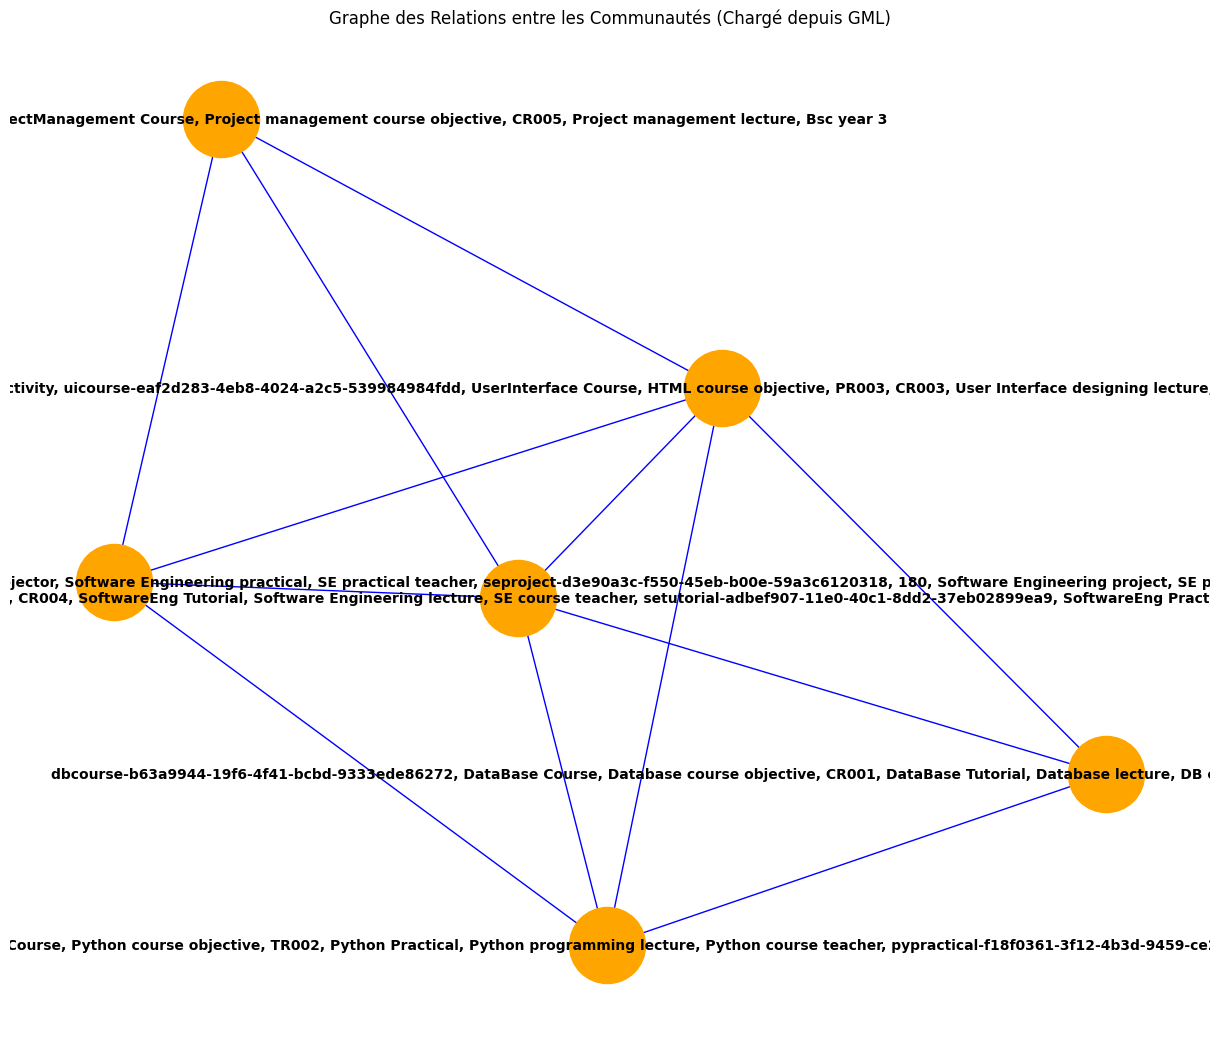

In [ ]:
# Charger le graphe depuis un fichier GML
G_community_loaded = nx.read_gml("community_graph.gml")

# Visualiser à nouveau le graphe chargé (pour vérifier)
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G_community_loaded, seed=42)
nx.draw(G_community_loaded, pos, with_labels=True, node_size=3000, node_color='orange', font_size=10, font_weight='bold', edge_color='blue')

plt.title("Graphe des Relations entre les Communautés (Chargé depuis GML)")
plt.show()


Le graphe a été chargé depuis community_graph.gml.
Nombre de communautés détectées : 2


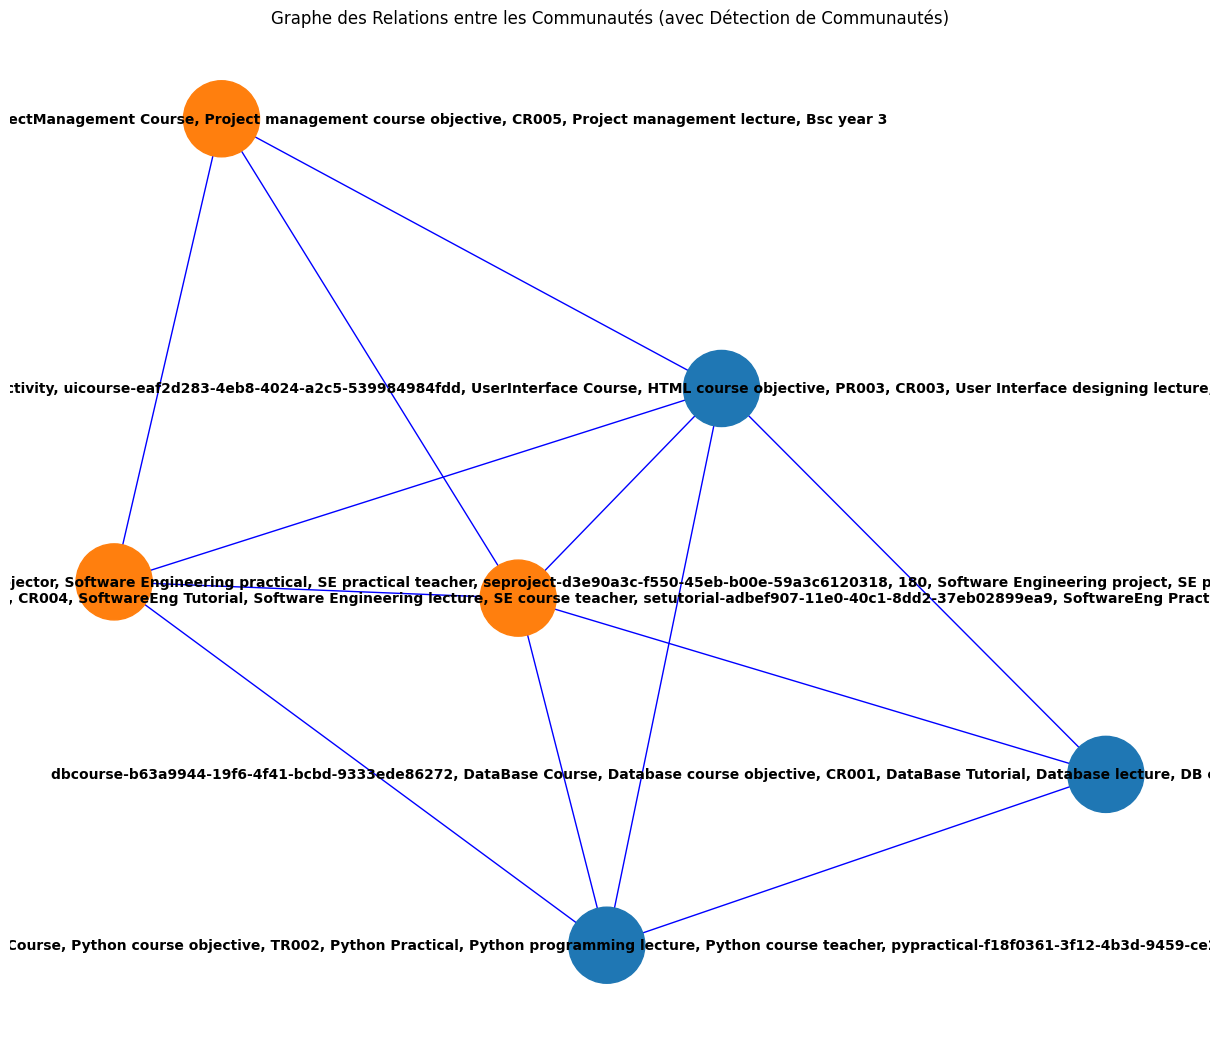

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain

# 1. Charger le graphe des communautés depuis le fichier GML
def load_graph(filename):
    """
    Charge un graphe à partir d'un fichier GML.
    Args:
        filename (str): Le nom du fichier à charger.
    Retourne:
        Graph: Le graphe chargé.
    """
    G = nx.read_gml(filename)
    print(f"Le graphe a été chargé depuis {filename}.")
    return G

# 2. Appliquer l'algorithme de Louvain pour détecter les communautés
def detect_communities(G):
    """
    Applique l'algorithme de Louvain pour détecter les communautés dans un graphe.
    Args:
        G (Graph): Le graphe sur lequel effectuer la détection.
    Retourne:
        dict: Un dictionnaire avec les communautés (clé = nœud, valeur = communauté).
    """
    partition = community_louvain.best_partition(G)
    print(f"Nombre de communautés détectées : {len(set(partition.values()))}")
    return partition

# 3. Visualiser les communautés détectées
def visualize_communities(G, partition):
    """
    Visualise le graphe avec les communautés détectées, en coloriant les nœuds selon leur communauté.
    Args:
        G (Graph): Le graphe à visualiser.
        partition (dict): Un dictionnaire de communautés (clé = nœud, valeur = communauté).
    """
    # Générer une liste de couleurs pour chaque communauté
    community_colors = [f"C{partition[node] % 10}" for node in G.nodes()]

    # Positionner les nœuds avec un algorithme de disposition
    pos = nx.spring_layout(G, seed=42)

    # Dessiner le graphe avec les couleurs des communautés
    plt.figure(figsize=(12, 10))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color=community_colors, font_size=10, font_weight='bold', edge_color='blue')
    plt.title("Graphe des Relations entre les Communautés (avec Détection de Communautés)")
    plt.show()

# 4. Exécution générale du processus
def main():
    # Charger le graphe depuis un fichier GML (modifiez le chemin du fichier si nécessaire)
    filename = "community_graph.gml"  # Chemin du fichier de votre graphe sauvegardé
    G = load_graph(filename)

    # Détecter les communautés dans le graphe
    partition = detect_communities(G)

    # Visualiser le graphe avec les communautés détectées
    visualize_communities(G, partition)

# Lancer l'exécution
if __name__ == "__main__":
    main()
